# **Analysez des données de systèmes éducatifs**


---



## **Introduction**

### **Entreprise**

Academy est une start-up qui fournit des formation en ligne pour des niveaux lycée et université.

### **Problématique** 
Analyser les données de la banque mondiale sur l'éducation afin de déterminer quels sont les pays avec les plus forts pontentiels d'expansion et déterminer dans quels pays opérer en priorité.

### **Besoins métiers**
- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

### **Mission**

A partir des données de la Banque mondiale, nous pouvons réaliser une pré-analyse exploratoire pour répondre aux interrogations suivantes :

*  Quels sont les pays avec un fort potentiel de clients pour nos services ?
* Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
* Dans quels pays l'entreprise doit-elle opérer en priorité ?

### **Demarche d'analyse**

*   Analyser la qualité des données 
*  Selectionner des indicateurs pertinents pour notre étude
*   Réaliser des representations graphiques des données
*   Score pour classer les pays à fort potentiel
*   Conclusion 



## **Préparation des dataset**

In [1]:
#Importation le dataset et les modules necessaires à l'exercice
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
#Importation des librairies utiles 
import numpy as np
import pandas as pd
pd.set_option("max_colwidth", None)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Chargement des jeux de données dans en dataframes
edStatsCountrySeries = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/Projet+Python_Dataset_Edstats_csv/EdStatsCountry-Series.csv')
edStatsCountry = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/Projet+Python_Dataset_Edstats_csv/EdStatsCountry.csv')
edStatsData = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/Projet+Python_Dataset_Edstats_csv/EdStatsData.csv')
edStatsFootNote = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/Projet+Python_Dataset_Edstats_csv/EdStatsFootNote.csv')
edStatsSeries = pd.read_csv(filepath_or_buffer = '/content/gdrive/My Drive/Projet+Python_Dataset_Edstats_csv/EdStatsSeries.csv')

## **Decouverte des jeux de données**

In [4]:
#Fonctions que l'on va utiliser pour l'étude des valeurs manquantes des jeux de données

def missingValues(df):
    df_null = pd.DataFrame({'Count' : df.isnull().sum(), 'Percentage': round(100*df.isnull().sum()/len(df),2)})
    #df_null_pos = df_null[df_null['Count'] > 0 ]
    df_null_sorted = df_null.sort_values(by=['Percentage'], ascending = False)
    df_null_sorted = pd.DataFrame(df_null_sorted)
    return df_null_sorted

def tauxDeReplissageMoyen(df):
    print(round((df.notna().mean().mean())*100,2))

def heatmapMissingValues(df):
    f,ax = plt.subplots(figsize=(25, 25))
    sns.heatmap(df.isnull(), cbar=False, ax=ax)

### **Jeux de données edStatsCountry et edStatsCountrySeries**



### 1.   EdStatsCountrySeries :
Ce jeu de donnée contient les références des sources de certains indicateurs par pays présents dans le jeu de données EdStatsCountry

In [5]:
#On regarde les 5 premieres lignes du DataFrame 
edStatsCountrySeries.head()

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


In [6]:
#On regarde les noms des colonnes
edStatsCountrySeries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [7]:
#on regarde le nombre de Code Pays unique
edStatsCountrySeries['CountryCode'].nunique()

211

In [8]:
edStatsCountrySeries.info()
# les types des variables sont bien cohérentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [9]:
print("Nombre de lignes dans le dataset edStatsCountrySeries : {}".format(edStatsCountrySeries.shape[0]))
print("Nombre de colonnes dans le dataset edStatsCountrySeries : {}".format(edStatsCountrySeries.shape[1]))

Nombre de lignes dans le dataset edStatsCountrySeries : 613
Nombre de colonnes dans le dataset edStatsCountrySeries : 4


In [10]:
#On regarde les valeurs manquantes
missingValues(edStatsCountrySeries)

,Count,Percentage
Unnamed: 3,613,100.0
CountryCode,0,0.0
SeriesCode,0,0.0
DESCRIPTION,0,0.0


In [11]:
#On supprime la variable nulle
edStatsCountrySeries.drop(['Unnamed: 3'], axis=1,inplace=True)

In [12]:
#Taux de remplissage moyen
tauxDeReplissageMoyen(edStatsCountrySeries)

100.0


In [13]:
#description des variables quanlitatives (ici toutes les variables)
edStatsCountrySeries.describe(exclude = [np.number])

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population Prospects
freq,18,211,154


In [14]:
#on regarde si il y a des doublons
edStatsCountrySeries.duplicated().sum()

0

In [15]:
# On recherche des noms des pays n'apparaissant pas dans le jeu de données edStatsCountrySeries
edStatsCountry[~edStatsCountry['Country Code'].isin(edStatsCountrySeries['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')
#Les pays présents dans edStats Country et pas dans edStatsCountrySeries sont des régions, des noms de regroupement de revenues, des pays ou des regrements de pays

,Short Name
5,Arab World
47,Curaçao
58,East Asia & Pacific (all income levels)
57,East Asia & Pacific (developing only)
63,Euro area
60,Europe & Central Asia (all income levels)
59,Europe & Central Asia (developing only)
68,European Union
92,Heavily indebted poor countries (HIPC)
89,High income


### 2.   EdStatsCountry
Ce jeu de donnée contient les informagions géographiques sur les pays, des données économiques et différentes dates des dernières études 

In [16]:
edStatsCountry.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [17]:
edStatsCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [18]:
edStatsCountry['Country Code'].nunique()

241

In [19]:
edStatsCountry.info()
#Certains types de variables ne sont pas cohérents mais on ne va pas se servir du dataframe entier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [20]:
print("Nombre de lignes dans le dataset edStatsCountry : {}".format(edStatsCountry.shape[0]))
print("Nombre de colonnes dans le dataset edStatsCountry : {}".format(edStatsCountry.shape[1]))

Nombre de lignes dans le dataset edStatsCountry : 241
Nombre de colonnes dans le dataset edStatsCountry : 32


In [21]:
#Le nombre total de valeurs manquantes 
edStatsCountry.isnull().sum().sum()

2354

In [22]:
#On regarde les valeurs manquantes
missingValues(edStatsCountry)

,Count,Percentage
Unnamed: 31,241,100.00
National accounts reference year,209,86.72
Alternative conversion factor,194,80.50
Other groups,183,75.93
Latest industrial data,134,55.60
Vital registration complete,130,53.94
External debt Reporting status,117,48.55
Latest household survey,100,41.49
Latest agricultural census,99,41.08
Lending category,97,40.25


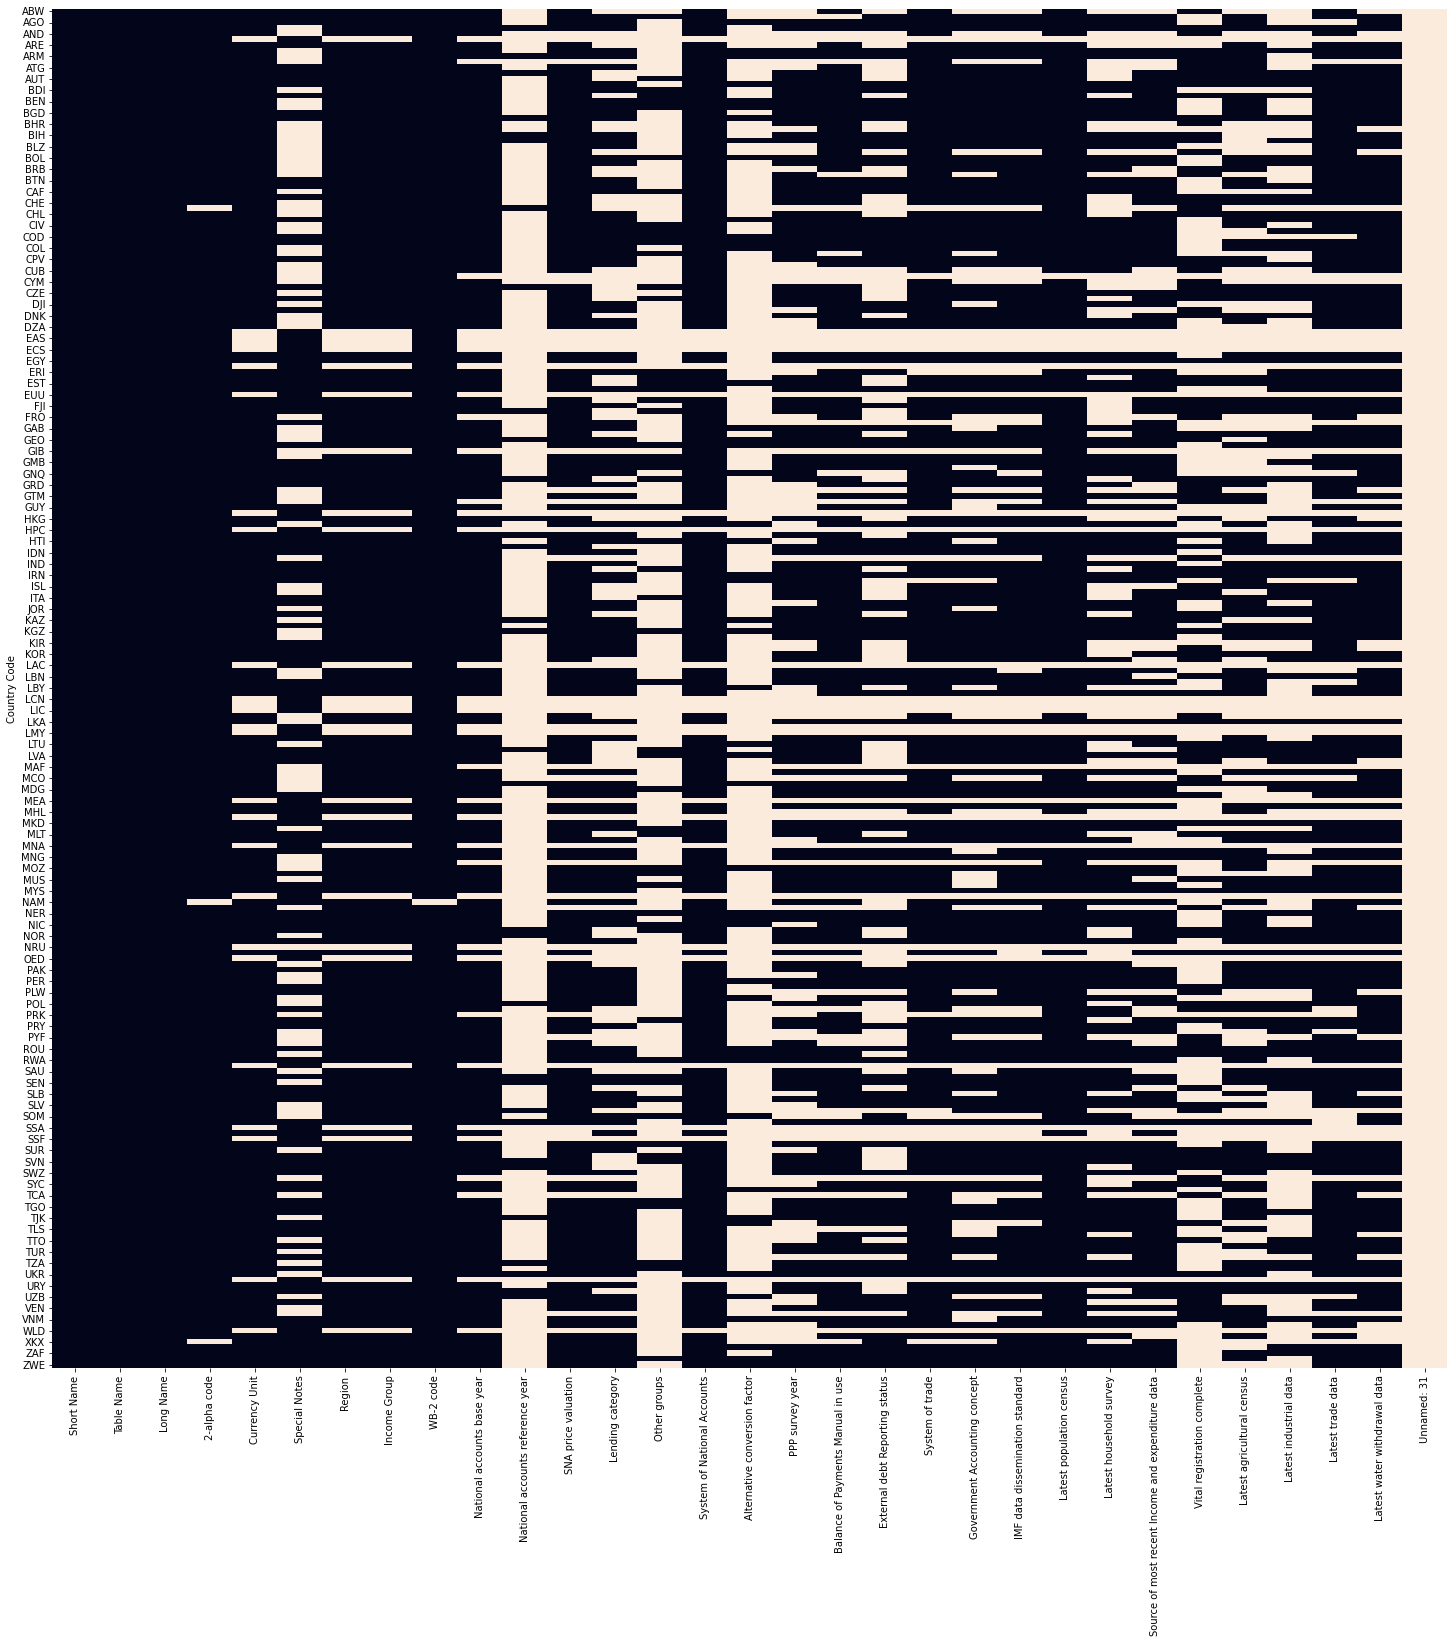

In [23]:
#Heatmap des valeurs manquantes
edStatsCountry2 = edStatsCountry.set_index('Country Code')
heatmapMissingValues(edStatsCountry2)
#Il y a beaucoup de valeurs manquantes pour les variables :'National accounts reference year', 'Other groups' et 'Alternative conversion factor'

In [24]:
#Taux de remplissage moyen
tauxDeReplissageMoyen(edStatsCountry)

69.48


In [25]:
#On supprime la variable nulle
edStatsCountry.drop(['Unnamed: 31'], axis=1,inplace=True)

In [26]:
#description des variables qualitatives
edStatsCountry.describe(exclude = [np.number])

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,205,197,144,58,215,47,145,181,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,43,2,3,2,3,32,3,1,3,2,2,2,27,60,75,2,35,20
top,ABW,Aruba,Aruba,Aruba,AW,Euro,"April 2012 database update: Based on official government statistics, national accounts data were revised for 2000 onward; the base year changed to 2006.",Europe & Central Asia,Upper middle income,AW,2005,Value added at basic prices (VAB),IBRD,HIPC,Country uses the 1993 System of National Accounts methodology.,1990–95,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,34,163,67,40,165,8,98,181,107,106,95,110,59,10,15,110,36,40


In [27]:
#description des variables quantitatives
edStatsCountry.describe()

,National accounts reference year,Latest industrial data,Latest trade data
count,32.00000,107.000000,185.000000
mean,2001.53125,2008.102804,2010.994595
std,5.24856,2.616834,2.569675
min,1987.00000,2000.000000,1995.000000
25%,1996.75000,2007.500000,2011.000000
50%,2002.00000,2009.000000,2012.000000
75%,2005.00000,2010.000000,2012.000000
max,2012.00000,2010.000000,2012.000000


In [28]:
#on regarde si il y a des doublons
edStatsCountry.duplicated().sum()

0

In [29]:
#On regarde les différents groupe de salaires
edStatsCountry['Income Group'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income', nan,
       'Lower middle income', 'High income: OECD'], dtype=object)

In [30]:
edStatsCountry['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

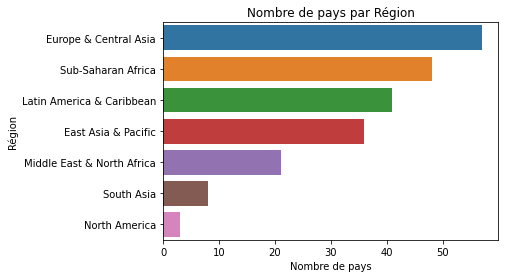

In [31]:
# Regroupement des pays par régions
nb_pays_par_region = edStatsCountry.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
#colors = ['Coral','Peru','HotPink','PowderBlue','Khaki','LightGreen','RoyalBlue','Cyan']
sns.barplot(nb_pays_par_region['Short Name'].sort_values(), nb_pays_par_region['Region'])
plt.xlabel('Nombre de pays')
plt.ylabel('Région') 
plt.title('Nombre de pays par Région');

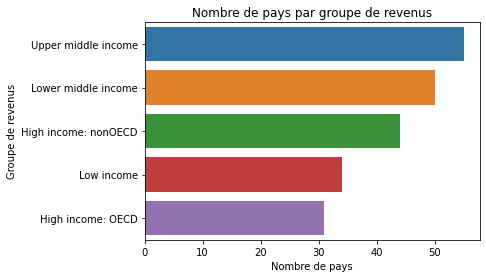

In [32]:
# Regroupement des pays par groupe de revenus
nb_pays_par_groupe_revenu=edStatsCountry.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name', ascending=False)
#colors = ['FireBrick','RoyalBlue','MediumPurple','MediumSeaGreen','SandyBrown','Khaki']
sns.barplot(nb_pays_par_groupe_revenu['Short Name'].sort_values(), nb_pays_par_groupe_revenu['Income Group'])
plt.xlabel('Nombre de pays')
plt.ylabel('Groupe de revenus')
plt.title('Nombre de pays par groupe de revenus');

### **Jeux de données edStatsData et edStatsSeries**

### 1. edStatsData
Ce jeu de données donne l'évolution de plusieurs indicateurs sur une période de 1970 à 2017 pour tous les pays du monde, avec des prédictions pour les années 2020 à 2100, il parait donc très intéressant pour notre étude.

In [33]:
edStatsData.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
edStatsData.info()
#les types de variables sont bien cohérents

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [35]:
print("Nombre de lignes dans le dataset edStatsData : {}".format(edStatsData.shape[0]))
print("Nombre de colonnes dans le dataset edStatsData : {}".format(edStatsData.shape[1]))

Nombre de lignes dans le dataset edStatsData : 886930
Nombre de colonnes dans le dataset edStatsData : 70


In [36]:
edStatsData.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [37]:
#On regarde les valeurs manquantes
missingValues(edStatsData)

,Count,Percentage
Unnamed: 69,886930,100.00
2017,886787,99.98
2016,870470,98.14
1971,851393,95.99
1973,851385,95.99
1972,851311,95.98
1974,851200,95.97
1979,850121,95.85
1976,849447,95.77
1989,849390,95.77


In [38]:
#On supprime les variables nulles
edStatsData.drop(['Unnamed: 69'], axis=1,inplace=True)

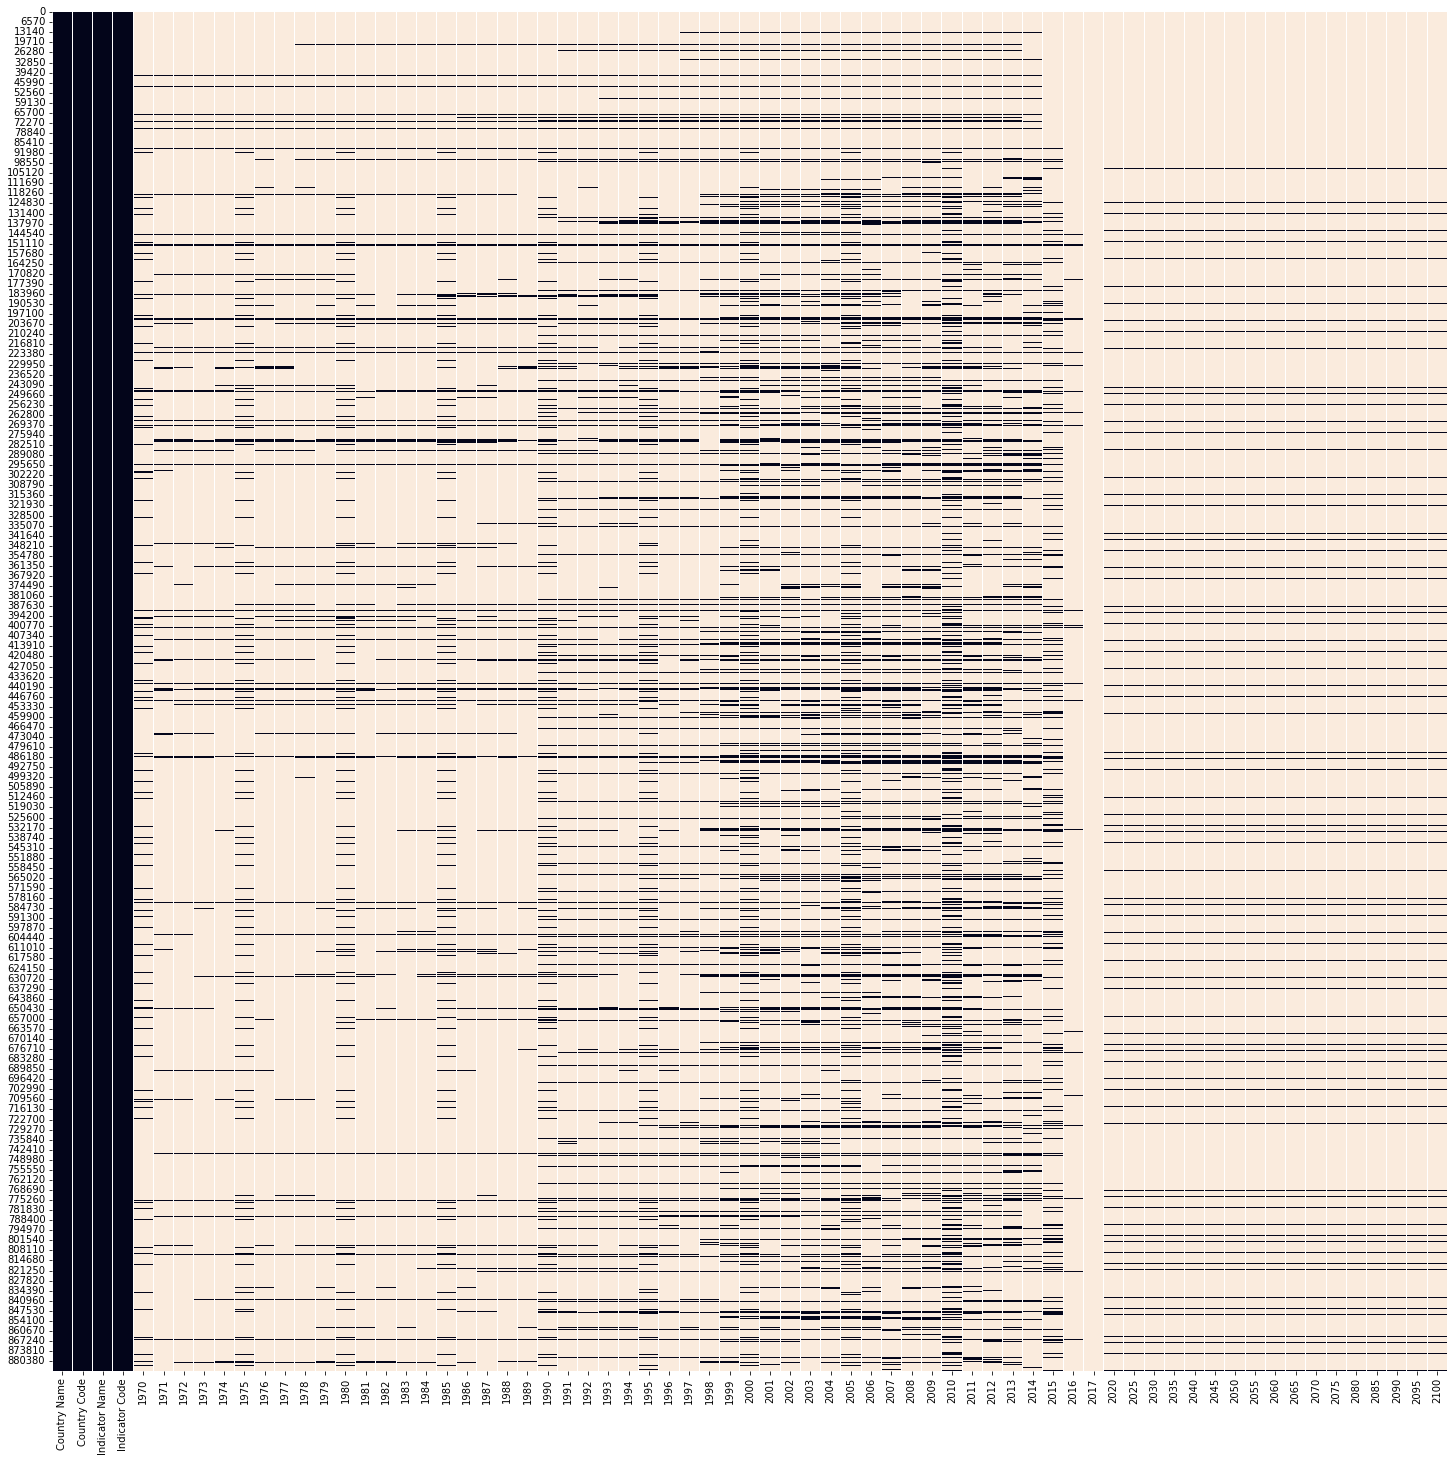

In [39]:
#On regarde une heatmap des valeurs manquantes
heatmapMissingValues(edStatsData)
#les quatres premieres colonnes n'ont pas de valeurs manquantes 

In [40]:
#Taux de remplissage moyen
tauxDeReplissageMoyen(edStatsData)

14.1


In [41]:
#on regarde si il y a des doublons
edStatsData.duplicated().sum()
#il n'y a pas des doublons 

0

Les années 2020 à 2100 sont des années de prédiction.
La décénnie 2010 comprends les années avec le plus de données significatives où l'année 2010 est la plus remplie.
L'année 2015 est l'année la plus récente qui est remplie.

In [42]:
#On regarde les pays présents dans edStatsData mais pas dans edStatsCountry
edStatsData[~edStatsData['Country Code'].isin(edStatsCountry['Country Code'])][['Country Name']].sort_values(by = 'Country Name').drop_duplicates()

,Country Name
190580,British Virgin Islands


In [43]:
#On recherche les pays présents dans edStatsData mais pas dans edStatsCountrySeries
edStatsData[~edStatsData['Country Code'].isin(edStatsCountrySeries['CountryCode'])][['Country Name']].sort_values(by = 'Country Name').drop_duplicates()

,Country Name
0,Arab World
193025,British Virgin Islands
278539,Curacao
4884,East Asia & Pacific
7330,East Asia & Pacific (excluding high income)
10996,Euro area
14661,Europe & Central Asia
21989,Europe & Central Asia (excluding high income)
23208,European Union
25656,Heavily indebted poor countries (HIPC)


### 2. EdStatsSeries
Ce jeu de données permet de connaître le thème des indicateurs, les descriptions longues et les sources 

In [44]:
edStatsSeries.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
edStatsSeries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

In [46]:
print("Nombre de lignes dans le dataset edStatsSeries : {}".format(edStatsSeries.shape[0]))
print("Nombre de colonnes dans le dataset edStatsSeries : {}".format(edStatsSeries.shape[1]))

Nombre de lignes dans le dataset edStatsSeries : 3665
Nombre de colonnes dans le dataset edStatsSeries : 21


In [47]:
#On regarde les valeurs manquantes
missingValues(edStatsSeries)

,Count,Percentage
Unnamed: 20,3665,100.00
Notes from original source,3665,100.00
License Type,3665,100.00
Related indicators,3665,100.00
Other web links,3665,100.00
Unit of measure,3665,100.00
Development relevance,3662,99.92
General comments,3651,99.62
Limitations and exceptions,3651,99.62
Statistical concept and methodology,3642,99.37


In [48]:
#Le nombre total de valeurs manquantes
edStatsSeries.isnull().sum().sum()

55203

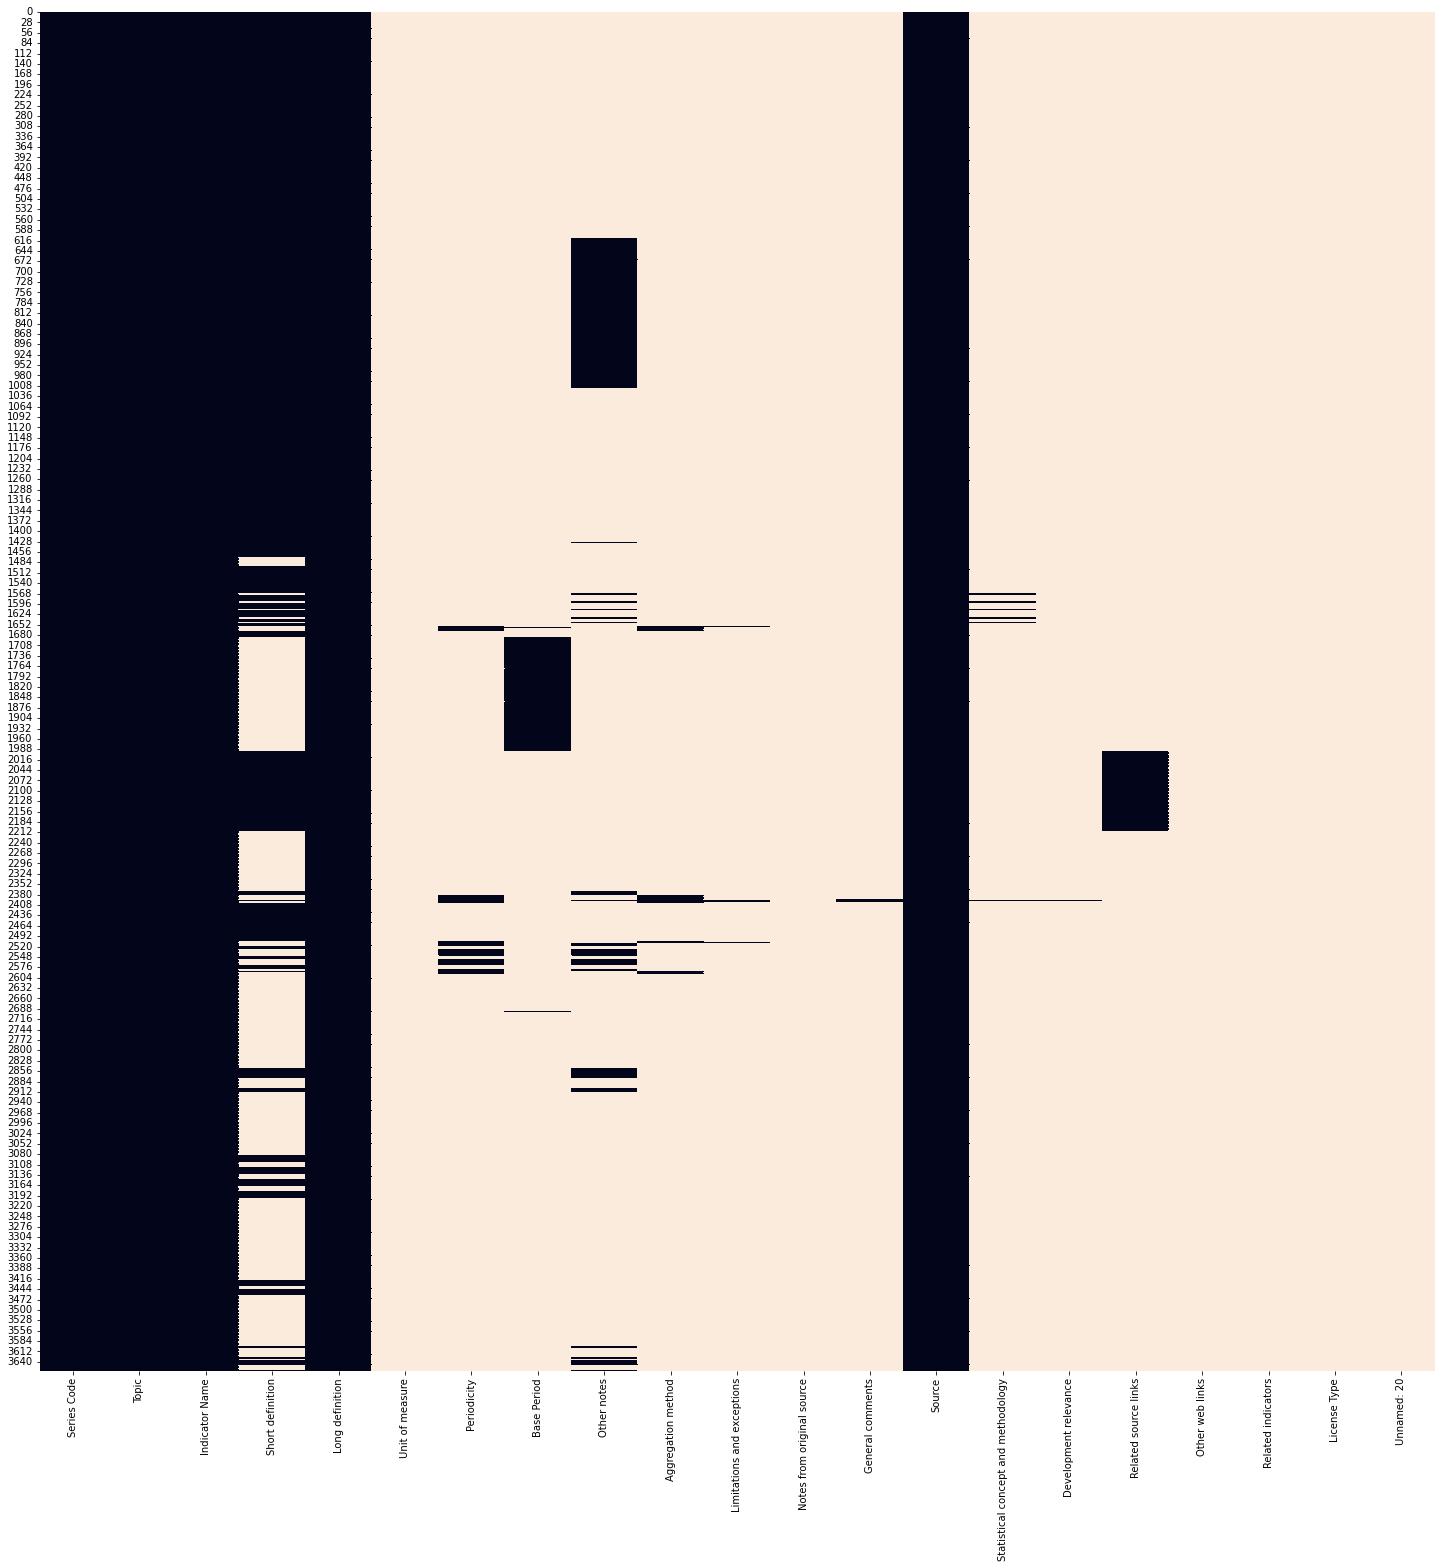

In [49]:
#On regarde une heatmap des valeurs manquantes
heatmapMissingValues(edStatsSeries)

In [50]:
#On supprime les variables nulles
edStatsSeries.drop(['Unit of measure','Notes from original source','Other web links','Related indicators','License Type','Unnamed: 20'], axis=1,inplace=True)

In [51]:
#on regarde si il y a des doublons
edStatsSeries.duplicated().sum()
#il n'y a pas de doublons 

0

In [52]:
#On regarde le nombre des valeurs uniques de 'Indicator Name'
edStatsSeries['Indicator Name'].nunique()

3665

In [53]:
#On regarde les valeurs uniques de la variable Topic
edStatsSeries['Topic'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

###**Jeu de données edStatsFootNote**
Ce jeu de donnée contient les années de références de mises à jour des indicateurs par pays et la description des incertitudes, exceptions, remarques sur les mises à jour 

In [54]:
edStatsFootNote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [55]:
edStatsFootNote.head()

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


In [56]:
print("Nombre de lignes dans le dataset edStatsFootNote : {}".format(edStatsFootNote.shape[0]))
print("Nombre de colonnes dans le dataset edStatsFootNote : {}".format(edStatsFootNote.shape[1]))

Nombre de lignes dans le dataset edStatsFootNote : 643638
Nombre de colonnes dans le dataset edStatsFootNote : 5


In [57]:
#On supprime les variables nulles
edStatsFootNote.drop(['Unnamed: 4'], axis=1,inplace=True)

In [58]:
#On regarde les valeurs manquantes
missingValues(edStatsFootNote)
#il n'y a pas de valeurs manquantes

,Count,Percentage
CountryCode,0,0.0
SeriesCode,0,0.0
Year,0,0.0
DESCRIPTION,0,0.0


In [59]:
#on regarde si il y a des doublons
edStatsFootNote.duplicated().sum()
#il n'y a pas de doublons

0

In [60]:
# Recherche des noms des pays n'apparaissant pas dans le jeu de données edStatsFootNote
edStatsCountry[~edStatsCountry['Country Code'].isin(edStatsFootNote['CountryCode'])][['Short Name']].sort_values(by = 'Short Name')
#Les pays présent dans le jeu de donnée edStatsCountry et non dans edStatsFootNote sont des noms des pays autonomes

,Short Name
85,Greenland
207,Sint Maarten (Dutch part)
134,St. Martin (French part)


##**Préparation du DataFrame pour la selection des indicateurs pertinents**

On va utiliser principalement le dataframe EdStatsData pour notre étude

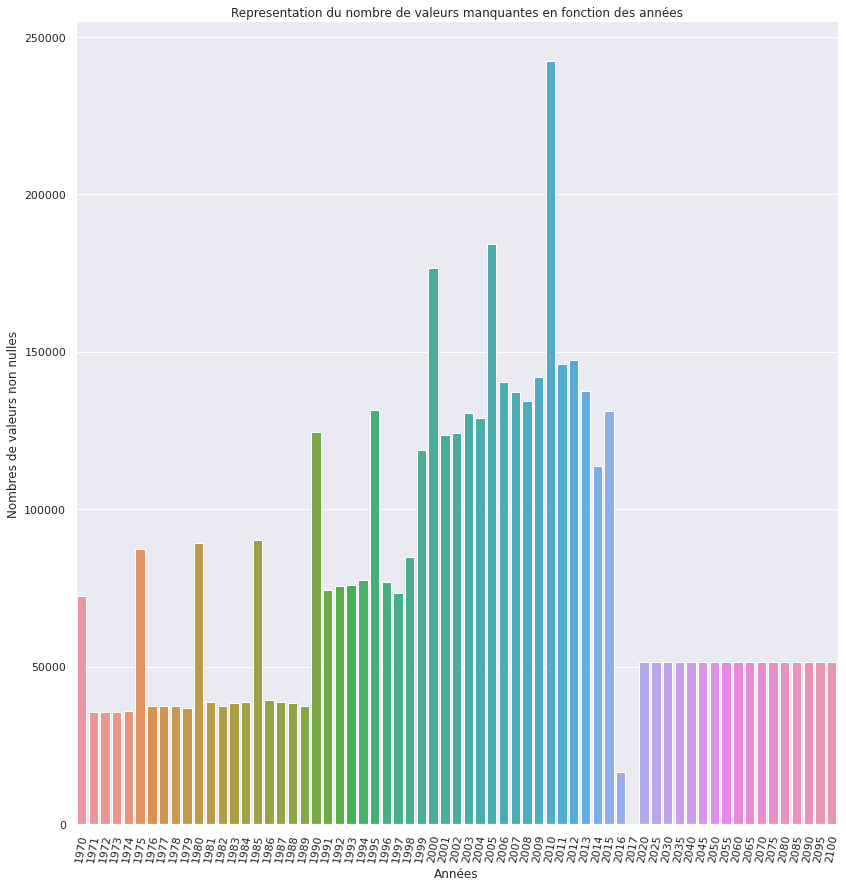

In [61]:
#On réduit les années sur lesquelles on va s'interesser
#On regarde les années où il y a beaucoup de valeurs manquantes 
sns.set(rc = {'figure.figsize':(15,10)})
dataPerYear = (edStatsData.drop(columns = ['Country Name','Country Code','Indicator Name', 'Indicator Code'])).notnull().sum().reset_index().rename(columns = {'index':'Années', 0:'Valeurs non nulles'})
sns.catplot(x = 'Années' ,y='Valeurs non nulles',data = dataPerYear,  kind = 'bar', height =12)
plt.xticks(rotation = 80)
plt.xlabel('Années')
plt.ylabel('Nombres de valeurs non nulles')
plt.title("Representation du nombre de valeurs manquantes en fonction des années")
plt.show()

In [62]:
#Calcul du taux de valeurs manquantes sur toutes les années
pd.set_option('display.max_rows', None)
df_null = pd.DataFrame({'Count' : edStatsData.isnull().sum(), 'Percent': round(100*edStatsData.isnull().sum()/len(edStatsData),2)})
#df_null_pos = df_null[df_null['Count'] > 0 ]
df_null_sorted = df_null.sort_values(by=['Percent'], ascending = False)
df_null_sorted = pd.DataFrame(df_null_sorted)
df_null_sorted

#On voit que les années 2017 et 2016 sont celles où il y a le plus de valeurs manquantes
#On voit aussi que les années 70 et les années futures ont beaucoup de valeurs manquantes

,Count,Percent
2017,886787,99.98
2016,870470,98.14
1971,851393,95.99
1973,851385,95.99
1972,851311,95.98
1974,851200,95.97
1979,850121,95.85
1982,849419,95.77
1989,849390,95.77
1976,849447,95.77


In [63]:
#On ne garde que les années de 2000 à 2015 
years = list(edStatsData.columns[4:].values)
years_to_drop = [year for year in years if int(year) < 2000 or int(year) > 2015]
edStatsData0015 = edStatsData.drop(years_to_drop, axis=1)
edStatsData0015.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


In [64]:
#On rajoute les variables dont on a besoin des autres jeux de données 
#Ajout de "Income Group" et de "Region" de EdStatsCountry
edStatsData0015 = edStatsData0015.merge(right = edStatsCountry[['Country Code', 'Region','Income Group']], on = 'Country Code')
edStatsData0015.insert(0,'Region', edStatsData0015.pop('Region'))
edStatsData0015.insert(5,'Income Group', edStatsData0015.pop('Income Group'))
edStatsData0015.head()

,Region,Country Name,Country Code,Indicator Name,Indicator Code,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,NaN,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN


In [65]:
#On cherche les pays non présent dans EdStatsCountrySeries pour les supprimer
pays = edStatsData0015[~edStatsData0015['Country Code'].isin(edStatsCountrySeries['CountryCode'])][['Country Name','Country Code']].sort_values(by='Country Name')
#On les supprime de notre DF
edStatsData0015.drop(list(pays.index), inplace = True)
edStatsData0015.shape

(773315, 22)

In [66]:
#On supprime les pays n'ayant pas de valeurs pour 'Income Group' et 'Region
countryWithoutRegion = edStatsData0015[edStatsData0015['Region'].isnull()][['Country Name']]
#il ne reste que Gibraltar 
edStatsData0015.drop(list(countryWithoutRegion.index), inplace = True)
edStatsData0015.shape

(769650, 22)

## **Selection des indicateurs pertinents :**


In [67]:
#On supprime quelques indicateurs inutiles à notre étude
indicators = edStatsData0015[~(edStatsData0015['Indicator Name'].str.contains(r'Female|female|Male|male|childhood|primary|Primary|Teacher|teacher|illiterate'))]
indicators.shape

(343980, 22)

In [68]:
#On supprime les indicateurs avec les ages dont on ne s'interesse pas
indicators = indicators[~(indicators['Indicator Name'].str.contains('29|30|35|40|45|50|55|60|65|70|75|80'))]
indicators.shape

(295470, 22)

### L'entreprise Academy propose des formations en ligne pour un public de niveau lycée et université
 
### Les types de données potentielles intéressantes pour le besoin métier sont :
- Niveau Demographie : population totale, ciblage d'une tranche d'age 15-25 ans
- Niveau Education : Nombre et taux d'étudiant dans le secondaire et le tertiaire
- Deploiement internet : Taux d'utilisation d'internet, possession d'un ordinateur, accès à l'electricité
- Niveau Economique : PIB, PIB/habitant, niveau de revenu 

### Niveau Demographie : population totale, ciblage d'une tranche d'age 15-25 ans

In [69]:
#On recherche la population totale avec les mots clés
dfpoptotal = indicators[(indicators['Indicator Name'].str.contains('population|Population|Total|total'))].drop(columns = ['Country Name','Country Code','Region','Income Group']).set_index(['Indicator Code','Indicator Name']).notnull().groupby(['Indicator Name', 'Indicator Code']).sum()

#Calcul du taux de remplissage par indicateurs et par année :
#Nombre de valeurs non nulles par indicateurs / nombre de ligne par indicateurs (nbre de pays par indicateurs)
dfpoptotalprcentage = round(100*dfpoptotal/ len(indicators['Country Code'].unique()),2)

#On calcule le taux de remplissage total
dfpoptotalprcentage['taux de remplissage total'] = round(dfpoptotalprcentage.mean(axis=1),2)
dfpoptotalprcentage.sort_values(['taux de remplissage total'],ascending = False).head()
#on choisit les indicateurs les plus pertinents avec le plus de données sur les années choisies
#On selectionne "Population, total" : SP.POP.TOTL
#Et aussi "Population growth (annual %)" : SP.POP.GROW

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,taux de remplissage total
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,
"Population, total",SP.POP.TOTL,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,99.52,99.52,99.52,99.52,99.88
Population growth (annual %),SP.POP.GROW,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,99.52,99.52,99.52,99.52,99.52,99.85
"Population, ages 15-64, total",SP.POP.1564.TO,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,90.95,90.95,90.95,90.95,91.31
"Population, ages 15-64 (% of total)",SP.POP.1564.TO.ZS,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,90.95,90.95,90.95,90.95,91.31
"Population, ages 0-14 (% of total)",SP.POP.0014.TO.ZS,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,91.43,90.95,90.95,90.95,90.95,91.31


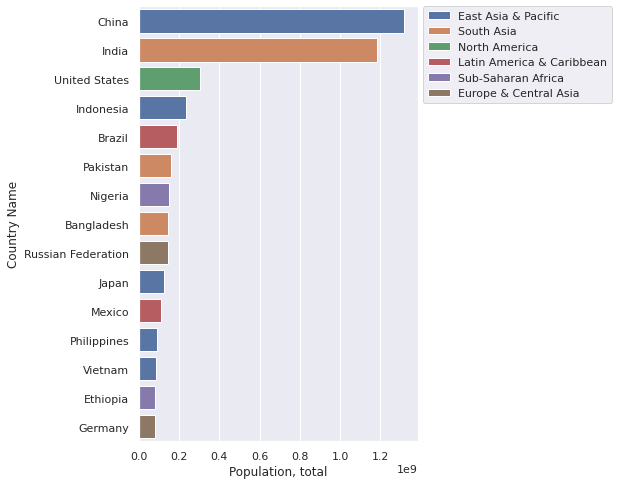

In [70]:
#On regarde le classement de la population totale en fonction des pays entre 2000 et 2015
dfpoptotal = indicators[indicators["Indicator Name"] == "Population, total"]
dfpoptotal["Population, total"] = dfpoptotal.loc[:,'2000':'2015'].mean(axis = 1)
dfpoptotal.dropna(subset=['Region'], inplace=True)
top15_dfpoptotal = dfpoptotal.sort_values(by="Population, total", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
ax = sns.barplot(x="Population, total", y="Country Name", data=top15_dfpoptotal, hue='Region', palette=["C0", "C1", "C2", "C3","C4","C5"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#La Chine et l'Inde ont le plus grosse population 

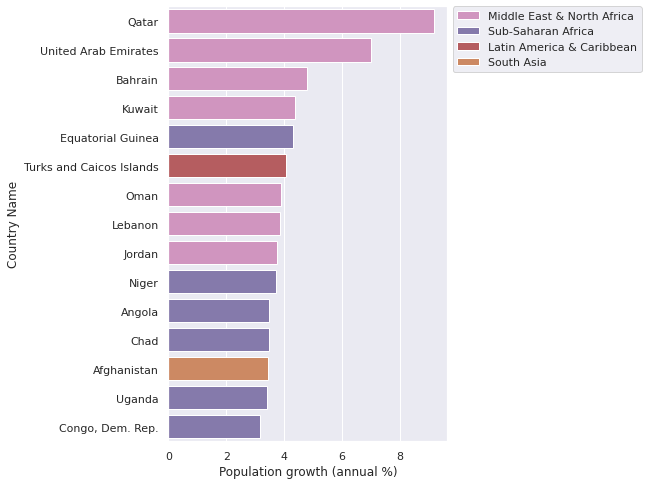

In [71]:
#On regarde le classement de la croissance demographique en fonction des pays entre 2000 et 2015
dfpopgrowth = indicators[indicators["Indicator Name"] == "Population growth (annual %)"]
dfpopgrowth["Population growth (annual %)"] = dfpopgrowth.loc[:,'2000':'2015'].mean(axis = 1)
dfpopgrowth.dropna(subset=['Region'], inplace=True)
top15_dfpopgrowth = dfpopgrowth.sort_values(by="Population growth (annual %)", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
ax = sns.barplot(x="Population growth (annual %)", y="Country Name", data=top15_dfpopgrowth, hue='Region', palette=["C6", "C4", "C3", "C1"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#Le Qatar et les Emirats Arabes unis ont le plus grande croissance demographie

In [72]:
#On recherche la population des jeunes de 15 à 24 ans
df15_24 = indicators[(indicators['Indicator Name'].str.contains('24'))].drop(columns = ['Country Name','Country Code','Region','Income Group']).groupby(['Indicator Name', 'Indicator Code']).count()
df15_24prcentage = round(100*df15_24/ len(indicators['Country Code'].unique()),2)
df15_24prcentage['taux de remplissage total'] = round(df15_24prcentage.mean(axis=1),2)
df15_24prcentage.sort_values(['taux de remplissage total'],ascending = False).head(5)
#on choisit l'indicateur le plus pertinent avec le plus de données sur les années choisies
#On selectionne  "Population, ages 15-24, total" : SP.POP.1524.TOUN

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,taux de remplissage total
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,
"Population, ages 15-24, total",SP.POP.1524.TO.UN,90.48,90.95,91.43,91.43,90.95,90.95,89.05,86.19,86.19,86.19,86.19,86.19,86.19,86.19,86.19,86.19,88.18
"Population, age 24, total",SP.POP.AG24.TO.UN,90.48,90.95,91.43,91.43,90.95,90.95,89.05,86.19,86.19,86.19,86.19,86.19,86.19,86.19,0.00,86.19,82.80
"Youth literacy rate, population 15-24 years, gender parity index (GPI)",SE.ADT.1524.LT.FM.ZS,20.48,13.33,8.57,4.76,8.57,9.52,12.38,16.19,14.29,15.24,22.38,27.14,19.52,13.81,17.14,15.24,14.91
"Youth literacy rate, population 15-24 years, both sexes (%)",SE.ADT.1524.LT.ZS,20.48,13.33,8.57,4.76,8.57,9.52,12.38,16.19,14.29,15.24,22.38,27.14,19.52,13.81,17.14,15.24,14.91
Barro-Lee: Percentage of population age 20-24 with tertiary schooling. Total (Incomplete and Completed Tertiary),BAR.TER.ICMP.2024.ZS,68.57,0.00,0.00,0.00,0.00,68.57,0.00,0.00,0.00,0.00,68.57,0.00,0.00,0.00,0.00,0.00,12.86


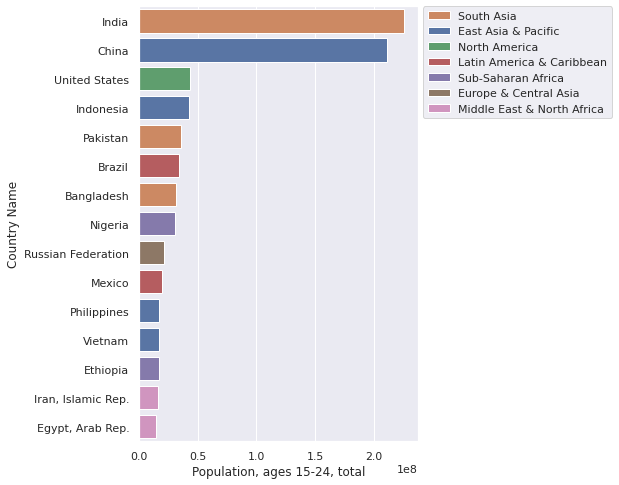

In [73]:
#On regarde le classement du nombre de personnes entre 15 et 24 ans en fonction des pays
df15_24 = indicators[indicators["Indicator Name"] == "Population, ages 15-24, total"]
df15_24["Population, ages 15-24, total"] = df15_24.loc[:,'2000':'2015'].mean(axis = 1)
top15_df15_24 = df15_24.sort_values(by="Population, ages 15-24, total", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
ax = sns.barplot(x="Population, ages 15-24, total", y="Country Name", data=top15_df15_24, hue='Region',palette=["C1", "C0", "C2", "C3","C4","C5","C6"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#L'Inde et la Chine ont le plus d'étudiants entre 15 et 24 ans

### Niveau Education : Nombre et taux d'étudiant dans le secondaire et le tertiaire

In [74]:
#On recherche des informations sur les lycéens
dfsec = indicators[(indicators['Indicator Name'].str.contains('secondary|Secondary'))].drop(columns = ['Country Name','Country Code','Region','Income Group']).groupby(['Indicator Name', 'Indicator Code']).count()
dfsecprcentage = round(100*dfsec/ len(indicators['Country Code'].unique()),2)
dfsecprcentage['taux de remplissage total'] = round(dfsecprcentage.mean(axis=1),2)
dfsecprcentage.sort_values(['taux de remplissage total'],ascending = False).head(15)
#On selectionne l'indicateur "Enrolment in upper secondary general, both sexes (number)" : UIS.E.3.GPV
# et aussi "Gross enrolment ratio, secondary, both sexes (%)" : SE.SEC.ENRR

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,taux de remplissage total
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,
Theoretical duration of lower secondary education (years),SE.SEC.DURS.LO,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.29,94.29,94.76,94.76,94.76,94.70
Theoretical duration of secondary education (years),SE.SEC.DURS,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.29,94.29,94.76,94.76,94.76,94.70
Theoretical duration of upper secondary education (years),SE.SEC.DURS.UP,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.29,94.29,94.76,94.76,94.76,94.70
Official entrance age to lower secondary education (years),SE.SEC.AGES,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.29,94.29,94.76,94.76,94.76,94.70
Official entrance age to upper secondary education (years),UIS.THAGE.3.A.GPV,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.76,94.29,94.29,94.76,94.29,93.81,94.61
"Population of the official age for upper secondary education, both sexes (number)",SP.SEC.UTOT.IN,90.00,90.95,90.95,91.43,91.43,90.95,90.95,91.43,91.43,91.90,91.43,91.43,91.43,91.43,91.90,90.95,91.25
"Population of the official age for lower secondary education, both sexes (number)",SP.SEC.LTOT.IN,90.00,90.95,90.95,91.43,91.43,90.95,90.95,91.43,91.43,91.90,90.95,91.43,91.43,91.43,91.43,90.95,91.19
"Population of the official age for secondary education, both sexes (number)",SP.SEC.TOTL.IN,90.00,90.95,90.95,91.43,91.43,90.95,90.95,91.43,91.43,91.90,90.95,90.95,90.95,90.95,91.43,90.95,91.10
"Population of the official entrance age to secondary general education, both sexes (number)",UIS.SAP.23.GPV.G1,89.52,90.48,90.48,90.95,90.95,90.48,90.95,90.48,90.48,90.95,90.00,90.95,90.48,90.48,89.52,87.14,90.27


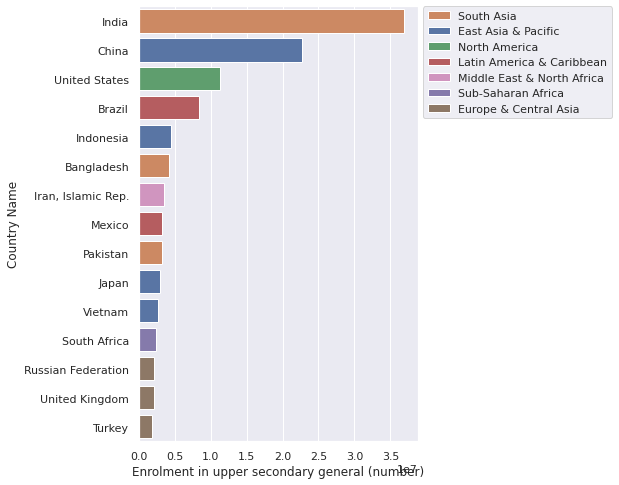

In [75]:
#On regarde le classement du nombre de lycéens en fonction des pays
dfsec = indicators[indicators["Indicator Name"] == "Enrolment in upper secondary general, both sexes (number)"]
dfsec["Enrolment in upper secondary general (number)"] = dfsec.loc[:,'2000':'2015'].mean(axis = 1)
dfsec.dropna(subset=['Region'], inplace=True)
top15_dfsec = dfsec.sort_values(by="Enrolment in upper secondary general (number)", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
sns.barplot(x="Enrolment in upper secondary general (number)", y="Country Name", data=top15_dfsec, hue='Region',palette=["C1", "C0", "C2", "C3","C6","C4","C5"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#L'Inde et la Chine ont la plus grosse population de lycéens

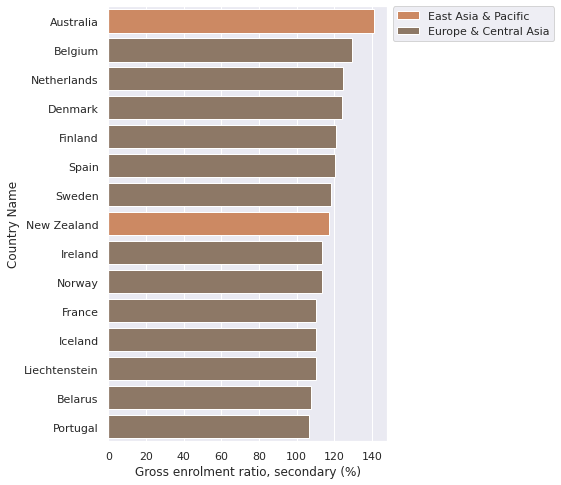

In [76]:
#On regarde le classement du taux brut de scolarisation de lycéens en fonction des pays
dfsec = indicators[indicators["Indicator Name"] == "Gross enrolment ratio, secondary, both sexes (%)"]
dfsec["Gross enrolment ratio, secondary (%)"] = dfsec.loc[:,'2000':'2015'].mean(axis = 1)
dfsec.dropna(subset=['Region'], inplace=True)
top15_dfsec = dfsec.sort_values(by="Gross enrolment ratio, secondary (%)", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
sns.barplot(x="Gross enrolment ratio, secondary (%)", y="Country Name", data=top15_dfsec, hue='Region',palette=["C1","C5"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#L'Australie a le taux brut de scolarisation de lycéens le plus élevé

In [77]:
#On recherche des informations sur les étudiants
dfter = indicators[(indicators['Indicator Name'].str.contains('tertiary|Tertiary'))].drop(columns = ['Country Name','Country Code','Region','Income Group']).groupby(['Indicator Name', 'Indicator Code']).count()
dfterprcentage = round(100*dfter/ len(indicators['Country Code'].unique()),2)
dfterprcentage['taux de remplissage total'] = round(dfterprcentage.mean(axis=1),2)
dfterprcentage.sort_values(['taux de remplissage total'],ascending = False).head(10)
#On selectionne l'indicateur "Enrolment in tertiary education, all programmes, both sexes (number)" : SE.TER.ENRL
#mais aussi l'indicateur "Gross enrolment ratio, tertiary, both sexes (%)" : SE.TER.ENRR

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,taux de remplissage total
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,
"Population of the official age for tertiary education, both sexes (number)",SP.TER.TOTL.IN,90.48,90.95,90.95,90.95,90.95,90.48,90.48,90.48,90.48,90.95,89.52,81.90,79.05,76.19,90.95,60.95,86.61
"Total outbound internationally mobile tertiary students studying abroad, all countries, both sexes (number)",UIS.OE.56.40510,92.38,92.38,92.38,92.38,92.86,92.86,92.86,92.86,92.86,92.86,92.86,92.86,92.86,92.86,0.00,0.00,81.13
Official entrance age to post-secondary non-tertiary education (years),UIS.THAGE.4.A.GPV,65.24,66.19,66.19,65.71,66.19,66.19,65.71,63.81,63.81,60.95,63.33,63.81,63.81,68.57,69.05,63.81,65.15
Theoretical duration of post-secondary non-tertiary education (years),UIS.THDUR.4.A.GPV,65.24,65.71,65.24,65.71,65.24,65.24,65.24,63.81,63.33,60.48,62.86,63.33,63.33,68.10,68.57,63.33,64.67
"Population of the official age for post-secondary non-tertiary education, both sexes (number)",UIS.SAP.4,62.38,63.33,62.86,63.33,63.33,62.86,62.38,60.95,60.95,59.05,60.95,61.90,62.38,66.19,66.19,59.05,62.38
"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,58.57,58.10,62.86,63.81,63.33,61.43,61.43,61.43,63.81,64.76,66.67,67.62,66.67,61.90,58.57,51.43,62.02
"Gross enrolment ratio, tertiary, both sexes (%)",SE.TER.ENRR,56.67,57.62,61.90,61.90,61.90,59.52,59.52,58.57,60.00,62.86,63.33,65.71,64.76,59.05,56.67,47.14,59.82
"Gross enrolment ratio, tertiary, gender parity index (GPI)",SE.ENR.TERT.FM.ZS,51.43,52.38,59.05,58.10,58.57,56.19,56.67,55.24,58.10,60.95,62.38,63.81,63.33,57.62,55.24,46.19,57.20
"Enrolment in tertiary education per 100,000 inhabitants, both sexes",UIS.TE_100000.56,57.62,57.62,61.90,63.33,62.38,60.95,60.00,59.05,61.90,64.29,64.76,65.71,62.86,58.10,44.29,1.90,56.67


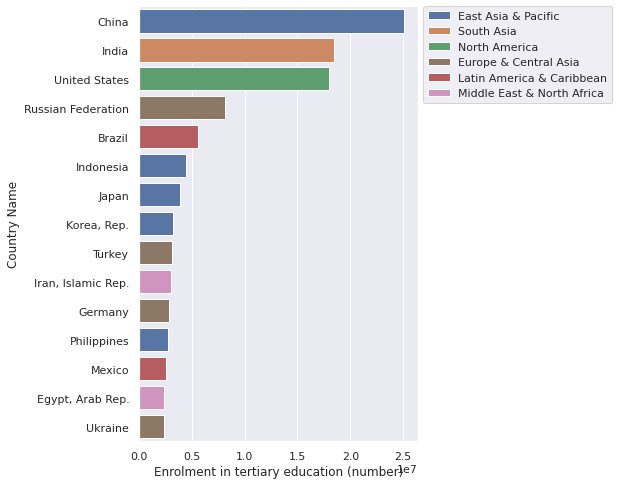

In [78]:
#On regarde le classement du nombre d'étudiants en fonction des pays
dfter = indicators[indicators["Indicator Name"] == "Enrolment in tertiary education, all programmes, both sexes (number)"]
dfter["Enrolment in tertiary education (number)"] = dfter.loc[:,'2000':'2015'].mean(axis = 1)
dfter.dropna(subset=['Region'], inplace=True)
top15_dfter = dfter.sort_values(by="Enrolment in tertiary education (number)", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
sns.barplot(x="Enrolment in tertiary education (number)", y="Country Name", data=top15_dfter, hue='Region',palette=["C0", "C1", "C2", "C5","C3","C6"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#La Chine et l'Inde ont la plus grosse population d'étudiants

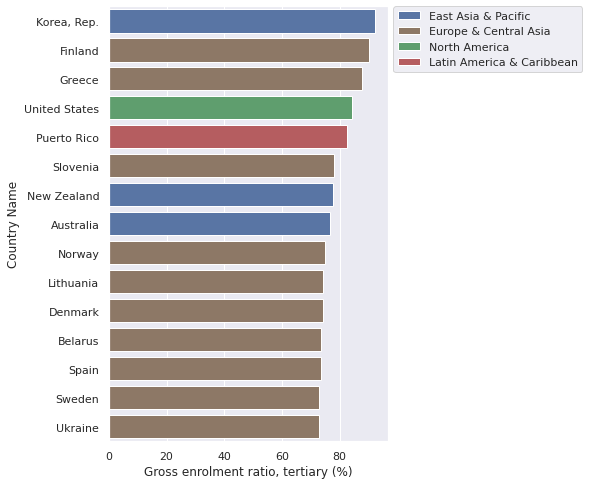

In [79]:
#On regarde le classement du taux brut de scolarisation d'étudiants en fonction des pays
dfsec = indicators[indicators["Indicator Name"] == "Gross enrolment ratio, tertiary, both sexes (%)"]
dfsec["Gross enrolment ratio, tertiary (%)"] = dfsec.loc[:,'2000':'2015'].mean(axis = 1)
dfsec.dropna(subset=['Region'], inplace=True)
top15_dfsec = dfsec.sort_values(by="Gross enrolment ratio, tertiary (%)", ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
sns.barplot(x="Gross enrolment ratio, tertiary (%)", y="Country Name", data=top15_dfsec, hue='Region',palette=["C0", "C5", "C2","C3"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#La Corée a le taux brut de scolarisation d'étudiants le plus élevé

### Deploiement internet : Taux d'utilisation d'internet, possession d'un ordinateur, accès à l'electricité

In [80]:
#On recherche des informations sur l'accès à internet
dfIT = indicators[(indicators['Indicator Name'].str.contains('internet|Internet|computer|Computer'))].drop(columns = ['Country Name','Country Code','Region','Income Group']).groupby(['Indicator Name', 'Indicator Code']).count()
dfITprcentage = round(100*dfIT/ len(indicators['Country Code'].unique()),2)
dfITprcentage['taux de remplissage total'] = round(dfITprcentage.mean(axis=1),2)
dfITprcentage.sort_values(['taux de remplissage total'],ascending = False).head(5)

#On selectionne l'indicateur "Internet users (per 100 people)" : IT.NET.USER.P2
#On selectionne l'indicateur "Personal computers (per 100 people)" : IT.CMP.PCMP.P2

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,taux de remplissage total
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,
Internet users (per 100 people),IT.NET.USER.P2,92.86,93.33,94.29,91.43,92.86,93.81,93.33,96.67,96.19,95.71,95.71,96.67,95.71,95.71,95.71,95.71,94.73
Personal computers (per 100 people),IT.CMP.PCMP.P2,76.67,86.67,86.67,85.24,85.24,81.43,47.14,22.86,12.86,1.43,0.00,0.00,0.00,0.00,0.00,0.00,36.64
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). No computer experience,LO.PIAAC.TEC.NO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.48,0.00,0.00,3.81,0.89
PIAAC: Adults by proficiency level in problem solving in technology-rich environments (%). Opted out of computer-based assessment,LO.PIAAC.TEC.OPT,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.48,0.00,0.00,3.81,0.89
PIAAC: Young adults by proficiency level in problem solving in technology-rich environments (%). No computer experience or failed the ICT core test,LO.PIAAC.TEC.YOU.FAILNO,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.48,0.00,0.00,3.81,0.89


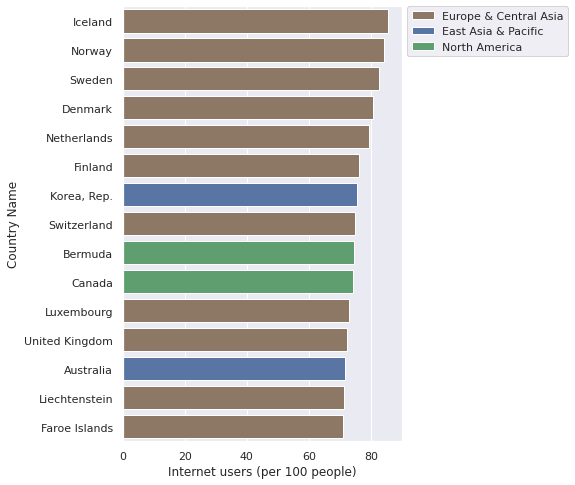

In [81]:
#On regarde le classement de l'accès à internet en fonction des pays
dfIT = indicators[indicators["Indicator Name"] == "Internet users (per 100 people)"]
dfIT['Internet users (per 100 people)'] = dfIT.loc[:,'2000':'2015'].mean(axis = 1)
top15_dfIT = dfIT.sort_values(by='Internet users (per 100 people)', ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
ax = sns.barplot(x="Internet users (per 100 people)", y="Country Name", data=top15_dfIT, hue='Region',palette=["C5", "C0", "C2"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#Les pays nordiques ont un meilleur accès internet que les autres pays

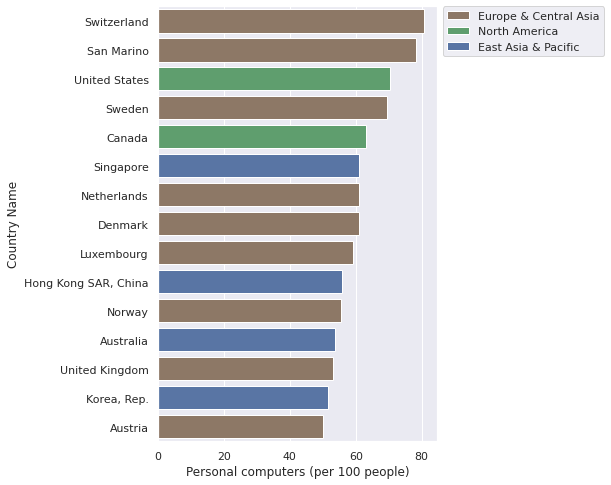

In [82]:
#On regarde le classement de l'accès à internet en fonction des pays
dfIT = indicators[indicators["Indicator Name"] == "Personal computers (per 100 people)"]
dfIT['Personal computers (per 100 people)'] = dfIT.loc[:,'2000':'2015'].mean(axis = 1)
dfIT.dropna(subset=['Region'], inplace=True)
top15_dfIT = dfIT.sort_values(by='Personal computers (per 100 people)', ascending=False).head(15)
sns.set(rc = {'figure.figsize':(5,8)})
ax = sns.barplot(x="Personal computers (per 100 people)", y="Country Name", data=top15_dfIT, hue='Region',palette=["C5", "C2", "C0"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#Les pays nordiques ont un meilleur accès internet que les autres pays

### Niveau Economique : PIB, PIB/habitant, niveau de revenu

In [83]:
#On recherche des informations sur le PIB, le PIB/habitant, niveau de revenu
dfGDP = indicators[(indicators['Indicator Name'].str.contains('GDP'))].drop(columns = ['Country Name','Country Code','Region','Income Group']).groupby(['Indicator Name', 'Indicator Code']).count()
dfGDPprcentage = round(100*dfGDP/ len(indicators['Country Code'].unique()),2)
dfGDPprcentage['taux de remplissage total'] = round(dfGDPprcentage.mean(axis=1),2)
dfGDPprcentage.sort_values(['taux de remplissage total'],ascending = False).head(10)

#On selectionne l'indicateur "GDP, PPP (current international $)" : NY.GDP.MKTP.PP.CD
#On selectionne l'indicateur "GDP per capita, PPP (current international $)" : NY.GDP.PCAP.PP.CD

,,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,taux de remplissage total
Indicator Name,Indicator Code,,,,,,,,,,,,,,,,,
GDP per capita (current US$),NY.GDP.PCAP.CD,94.76,94.76,96.67,96.67,97.14,97.14,97.62,97.14,96.19,95.71,96.19,96.19,94.29,94.76,93.81,93.33,95.77
GDP at market prices (current US$),NY.GDP.MKTP.CD,94.76,94.76,96.67,96.67,97.14,97.14,97.62,97.14,96.19,95.71,96.19,96.19,94.29,94.76,93.81,93.33,95.77
GDP at market prices (constant 2005 US$),NY.GDP.MKTP.KD,91.43,91.90,94.29,94.29,94.29,94.29,94.29,94.29,94.29,94.29,96.19,94.29,93.33,93.33,92.38,91.90,93.69
GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,91.43,91.90,94.29,94.29,94.29,94.29,94.29,94.29,94.29,94.29,96.19,94.29,93.33,93.33,92.38,91.90,93.69
"GDP per capita, PPP (constant 2011 international $)",NY.GDP.PCAP.PP.KD,89.05,89.52,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.95,89.05,89.05,88.10,87.62,89.58
"GDP, PPP (constant 2011 international $)",NY.GDP.MKTP.PP.KD,89.05,89.52,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.95,89.05,89.05,88.10,87.62,89.58
"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,88.57,89.52,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.95,89.05,89.05,88.10,87.62,89.55
"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,88.57,89.52,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.00,90.95,89.05,89.05,88.10,87.62,89.55
Government expenditure on education as % of GDP (%),SE.XPD.TOTL.GD.ZS,57.62,55.71,60.00,53.81,59.52,53.33,53.33,53.33,58.57,57.62,60.48,57.14,53.81,55.24,41.90,20.48,53.24


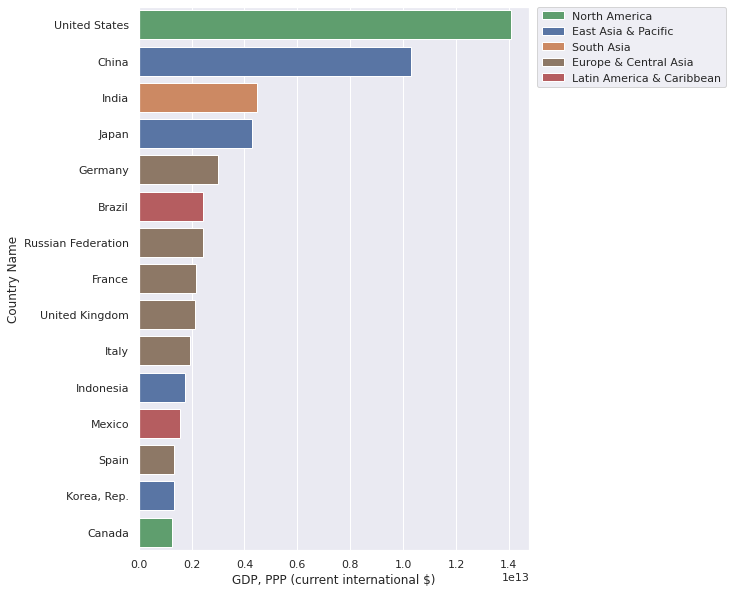

In [84]:
#On regarde le classement du PIB en fonction des pays de 2010 à 2015
dfGDP = indicators[indicators["Indicator Name"] == "GDP, PPP (current international $)" ]
dfGDP['GDP, PPP (current international $)'] = dfGDP.loc[:,'2000':'2015'].mean(axis=1)
dfGDP.dropna(subset=['Region'], inplace=True)
top15_dfGDP = dfGDP.sort_values(by="GDP, PPP (current international $)", ascending=False).head(15)

sns.set(rc = {'figure.figsize':(7,10)})
sns.barplot(x="GDP, PPP (current international $)", y="Country Name", data=top15_dfGDP, hue='Region',palette=["C2", "C0", "C1", "C5","C3"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#Les Etats Unis et la Chine depassent largement le PIB des autres pays

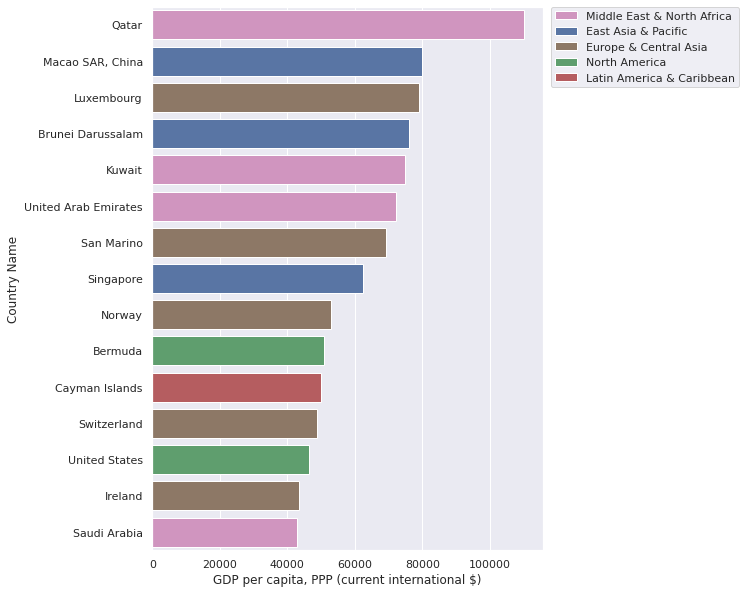

In [85]:
#On regarde le classement du PIB par habitant en fonction des pays de 2010 à 2015
dfGDP = indicators[indicators["Indicator Name"] == "GDP per capita, PPP (current international $)" ]
dfGDP["GDP per capita, PPP (current international $)"] = dfGDP.loc[:,'2000':'2015'].mean(axis=1)
dfGDP.dropna(subset=['Region'], inplace=True)
top15_dfGDP = dfGDP.sort_values(by="GDP per capita, PPP (current international $)", ascending=False).head(15)

sns.set(rc = {'figure.figsize':(7,10)})
sns.barplot(x="GDP per capita, PPP (current international $)", y="Country Name", data=top15_dfGDP, hue='Region',palette=["C6", "C0", "C5", "C2","C3"], dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
#Le Qatar depassent largement le PIB par habitant des autres pays

In [86]:
#On regarde la définition longue de l'indicateur "GDP per capita, PPP (current international $)"
edStatsSeries[edStatsSeries['Series Code']=='NY.GDP.PCAP.PP.CD'][['Long definition']]

,Long definition
1664,GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars based on the 2011 ICP round.


In [87]:
#On regarde la définition longue de l'indicateur "GDP, PPP (current international $)"
edStatsSeries[edStatsSeries['Series Code']=='NY.GDP.MKTP.PP.CD'][['Long definition']]

,Long definition
1660,PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current international dollars. For most economies PPP figures are extrapolated from the 2011 International Comparison Program (ICP) benchmark estimates or imputed using a statistical model based on the 2011 ICP. For 47 high- and upper middle-income economies conversion factors are provided by Eurostat and the Organisation for Economic Co-operation and Development (OECD).


##**Selection des indicateurs retenus**

*   "Population, total" : SP.POP.TOTL
*   "Population growth (annual %)" : SP.POP.GROW
* "Population, ages 15-24, total"	: SP.POP.1524.TO.UN
* "Enrolment in upper secondary general, both sexes (number)" : UIS.E.3.GPV
* "Gross enrolment ratio, secondary, both sexes (%)" : SE.SEC.ENRR 
* "Enrolment in tertiary education, all programmes, both sexes (number)" : SE.TER.ENRL
* "Gross enrolment ratio, tertiary, both sexes (%)" : SE.TER.ENRR
* "Internet users (per 100 people)" : IT.NET.USER.P2
* "Personal computers (per 100 people)" : IT.CMP.PCMP.P2
* "GDP, PPP (current international $)" : NY.GDP.MKTP.PP.CD

* "GDP per capita, PPP (current international $)": NY.GDP.PCAP.PP.CD 

In [88]:
#On ne garde que les indicateurs choisis dans edStatsData
indicators_to_keep = ['SP.POP.TOTL','SP.POP.GROW','SP.POP.1524.TO.UN','UIS.E.3.GPV','SE.SEC.ENRR','SE.TER.ENRL',
                      'SE.TER.ENRR','IT.NET.USER.P2','IT.CMP.PCMP.P2','NY.GDP.MKTP.PP.CD','NY.GDP.PCAP.PP.CD']
edStatsDataFinal = edStatsData0015[edStatsData0015['Indicator Code'].isin(indicators_to_keep)]
edStatsDataFinal.head()

,Region,Country Name,Country Code,Indicator Name,Indicator Code,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92829,South Asia,Afghanistan,AFG,"Enrolment in tertiary education, all programmes, both sexes (number)",SE.TER.ENRL,Low income,NaN,NaN,NaN,2.621100e+04,2.764800e+04,NaN,NaN,NaN,NaN,9.518500e+04,NaN,9.750400e+04,NaN,NaN,2.628740e+05,NaN
92845,South Asia,Afghanistan,AFG,"Enrolment in upper secondary general, both sexes (number)",UIS.E.3.GPV,Low income,NaN,159952.00000,1.077330e+05,1.136900e+05,1.705910e+05,1.810930e+05,NaN,2.778900e+05,3.514770e+05,4.202910e+05,5.559060e+05,7.253200e+05,8.579960e+05,9.397470e+05,9.437500e+05,NaN
92872,South Asia,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,Low income,NaN,NaN,8.755176e+02,9.228294e+02,9.163345e+02,1.011596e+03,1.065620e+03,1.210479e+03,1.247066e+03,1.482099e+03,1.581601e+03,1.660740e+03,1.873154e+03,1.877412e+03,1.875447e+03,1.864974e+03
92874,South Asia,Afghanistan,AFG,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,Low income,NaN,NaN,1.924381e+10,2.128492e+10,2.210105e+10,2.536151e+10,2.759257e+10,3.221907e+10,3.403746e+10,4.150519e+10,4.555511e+10,4.933825e+10,5.750013e+10,5.957345e+10,6.143594e+10,6.291767e+10
92960,South Asia,Afghanistan,AFG,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,Low income,NaN,13.04874,NaN,1.331708e+01,1.866479e+01,1.978370e+01,2.993046e+01,3.008316e+01,4.022338e+01,4.673276e+01,5.324683e+01,5.461618e+01,5.667734e+01,5.668866e+01,5.565616e+01,5.564441e+01


## **Analyse de la qualité des données**

### On veut supprimer les pays trop petits qui ont une population inférieure à 2 millions




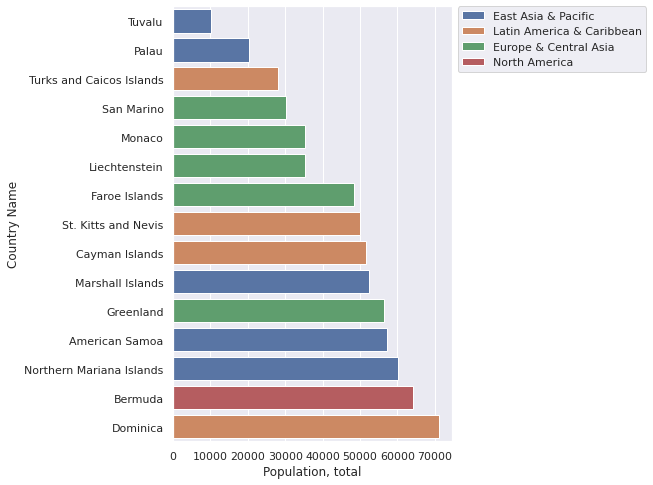

In [89]:
#On regarde le classement des pays en fonction de la population totale entre 2000 et 2015
dfpoptotal = edStatsData0015[edStatsData0015["Indicator Name"] == "Population, total"]
dfpoptotal["Population, total"] = dfpoptotal.loc[:,'2000':'2015'].mean(axis = 1)
dfpoptotal.dropna(subset=['Region'], inplace=True)
top20_dfpoptotal = dfpoptotal.sort_values(by="Population, total").head(15)

sns.set(rc = {'figure.figsize':(5,8)})
sns.barplot(x="Population, total", y="Country Name", data=top20_dfpoptotal, hue='Region', dodge=False)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [90]:
#On va Supprimer les petits pays 
# On va regarder pour chaque pays la "Population, total" : SP.POP.TOTL pour chaque pays 
poptotal = edStatsData0015[edStatsData0015['Indicator Code'] =='SP.POP.TOTL']
poptotal["mean"] = poptotal.loc[:,'2000':'2015'].mean(axis=1)
poptotal.sort_values(by='mean').head(5)

,Region,Country Name,Country Code,Indicator Name,Indicator Code,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,mean
827158,East Asia & Pacific,Tuvalu,TUV,"Population, total",SP.POP.TOTL,Upper middle income,9420.0,9512.0,9635.0,9767.0,9894.0,10027.0,10137.0,10243.0,10340.0,10441.0,10531.0,10628.0,10725.0,10819.0,10908.0,11001.0,10251.7500
636578,East Asia & Pacific,Palau,PLW,"Population, total",SP.POP.TOTL,Upper middle income,19175.0,19404.0,19574.0,19700.0,19804.0,19906.0,20012.0,20116.0,20228.0,20342.0,20470.0,20599.0,20758.0,20920.0,21094.0,21288.0,20211.8750
823493,Latin America & Caribbean,Turks and Caicos Islands,TCA,"Population, total",SP.POP.TOTL,High income: nonOECD,18873.0,20185.0,21742.0,23410.0,25028.0,26448.0,27642.0,28640.0,29481.0,30245.0,30994.0,31731.0,32431.0,33108.0,33739.0,34339.0,28002.2500
687888,Europe & Central Asia,San Marino,SMR,"Population, total",SP.POP.TOTL,High income: nonOECD,27418.0,27762.0,28121.0,28494.0,28866.0,29240.0,29614.0,29977.0,30351.0,30723.0,31110.0,31504.0,31914.0,32303.0,32657.0,32960.0,30188.3750
566943,Europe & Central Asia,Monaco,MCO,"Population, total",SP.POP.TOTL,High income: nonOECD,32082.0,32360.0,32629.0,32933.0,33314.0,33793.0,34408.0,35111.0,35853.0,36534.0,37094.0,37497.0,37783.0,37971.0,38132.0,38307.0,35362.5625


In [91]:
#On supprime donc les pays avec une population infénieur à 2 millions
smallcountries = poptotal[poptotal["mean"]< 2E6]['Country Name'].tolist()
print("on a supprimé",len(smallcountries),"pays sur", poptotal.shape[0])
edStatsDataFinal = edStatsDataFinal[~edStatsDataFinal["Country Name"].isin(smallcountries)]

on a supprimé 66 pays sur 210


### On regarde les valeurs manquantes des indicateurs qu'on a choisi

In [92]:
#Taux de remplissage de chaque indicateur en fonction des années
tauxDeRemplissage = edStatsDataFinal.drop(columns = ['Country Code','Region','Income Group']).set_index(['Indicator Code','Indicator Name']).notnull().groupby(['Indicator Code','Indicator Name']).sum()            
totalpays = len(edStatsDataFinal['Country Code'].unique())
tauxDeRemplissageprcentage = round(tauxDeRemplissage*100/ totalpays,2)
tauxDeRemplissageprcentage

,,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Indicator Code,Indicator Name,,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,Personal computers (per 100 people),100.0,84.03,93.06,93.06,91.67,90.97,90.28,52.78,26.39,15.28,1.39,0.00,0.00,0.00,0.00,0.00,0.00
IT.NET.USER.P2,Internet users (per 100 people),100.0,96.53,99.31,98.61,95.83,96.53,97.22,96.53,100.00,99.31,99.31,99.31,100.00,99.31,99.31,99.31,99.31
NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",100.0,95.83,95.83,96.53,96.53,96.53,96.53,96.53,96.53,96.53,96.53,96.53,96.53,95.14,95.14,94.44,93.75
NY.GDP.PCAP.PP.CD,"GDP per capita, PPP (current international $)",100.0,95.83,95.83,96.53,96.53,96.53,96.53,96.53,96.53,96.53,96.53,96.53,96.53,95.14,95.14,94.44,93.75
SE.SEC.ENRR,"Gross enrolment ratio, secondary, both sexes (%)",100.0,75.00,75.69,75.69,72.92,77.78,78.47,77.08,79.17,76.39,77.08,75.00,79.17,76.39,74.31,70.83,61.11
SE.TER.ENRL,"Enrolment in tertiary education, all programmes, both sexes (number)",100.0,68.75,69.44,74.31,74.31,76.39,73.61,72.22,72.22,75.00,77.08,77.78,80.56,78.47,75.69,71.53,60.42
SE.TER.ENRR,"Gross enrolment ratio, tertiary, both sexes (%)",100.0,68.06,69.44,74.31,72.92,75.00,72.22,70.83,70.14,72.22,74.31,73.61,77.78,76.39,72.92,69.44,55.56
SP.POP.1524.TO.UN,"Population, ages 15-24, total",100.0,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61,98.61
SP.POP.GROW,Population growth (annual %),100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,99.31,99.31,99.31,99.31,99.31


In [93]:
#On regarde la corrélation entre les variables 'Personal computers (per 100 people)' et 'Internet users (per 100 people)'
#Pivot du dataframe dataFinal en 2002 là ou il y a le plus de données pour la variable 'Personal computers (per 100 people)'
dataFinal2 = edStatsDataFinal[['Region','Country Name','Indicator Name','Income Group','2002']]
datapivot = dataFinal2.pivot(index=["Country Name", "Region","Income Group"], columns = 'Indicator Name', values ='2002')
datapivot = datapivot.reset_index()
datapivot = datapivot.rename_axis(None, axis=1)
datapivot = datapivot[['Region','Country Name','Income Group','Internet users (per 100 people)','Personal computers (per 100 people)']]
datapivot.head()

,Region,Country Name,Income Group,Internet users (per 100 people),Personal computers (per 100 people)
0,South Asia,Afghanistan,Low income,0.004561,NaN
1,Europe & Central Asia,Albania,Upper middle income,0.390081,1.103078
2,Middle East & North Africa,Algeria,Upper middle income,1.591641,0.742947
3,Sub-Saharan Africa,Angola,Upper middle income,0.270377,0.181371
4,Latin America & Caribbean,Argentina,Upper middle income,10.882124,7.972883


In [94]:
#On vérifie la corrélation entre les deux indicateurs
datapivot.corr()

,Internet users (per 100 people),Personal computers (per 100 people)
Internet users (per 100 people),1.000000,0.948268
Personal computers (per 100 people),0.948268,1.000000


In [95]:
#On voit que l'indicateur "Personal computers (per 100 people)" est partiellement rempli : pas de données de 2010 à 2015
# C'est les années les plus interessantes pour notre étude 
#On suppose que si ils ont accès à internet, ils ont de quoi se connecter à internet : cyber café, tablettes, ordi..
#On choisi donc de supprimer l'indicateur pour notre étude 
edStatsDataFinal = edStatsDataFinal[edStatsDataFinal['Indicator Name']!= 'Personal computers (per 100 people)']
edStatsDataFinal['Indicator Name'].unique()

array(['Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary general, both sexes (number)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (current international $)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Internet users (per 100 people)', 'Population growth (annual %)',
       'Population, ages 15-24, total', 'Population, total'], dtype=object)

In [96]:
#On supprime Country Code et indicator Code comme on en a plus besoin 
edStatsDataFinal.drop(['Country Code','Indicator Code'], axis=1, inplace = True)

In [97]:
#On regarde les valeurs manquantes de notre dataframe
edStatsDataFinal.isna().sum()

Region              0
Country Name        0
Indicator Name      0
Income Group        0
2000              172
2001              164
2002              144
2003              161
2004              143
2005              149
2006              157
2007              146
2008              145
2009              137
2010              146
2011              128
2012              142
2013              157
2014              197
2015              340
dtype: int64

In [98]:
#On regarde le nombre de pays restant dans notre étude
edStatsDataFinal['Country Name'].nunique()

144

### On va s'interesser seulement à la dernière année la plus remplie : l'année 2014

In [99]:
#On ne va garder que la derniere année ou il y a le plus de données : l'année 2014
dataFinal14 = edStatsDataFinal[['Region','Country Name','Indicator Name','Income Group','2014']]
dataFinal14.rename(columns={'2014': 'Année la plus récente'}, inplace=True)

### On réalise un pivot de notre Dataframe

In [100]:
#Pivot du dataframe dataFinal 
dataFinalpivot = dataFinal14.pivot(index=["Country Name", "Region","Income Group"], columns = 'Indicator Name', values ='Année la plus récente')
dataFinalpivot = dataFinalpivot.reset_index()
dataFinalpivot = dataFinalpivot.rename_axis(None, axis=1)
dataFinalpivot.head()

,Country Name,Region,Income Group,"Enrolment in tertiary education, all programmes, both sexes (number)","Enrolment in upper secondary general, both sexes (number)","GDP per capita, PPP (current international $)","GDP, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total","Population, total"
0,Afghanistan,South Asia,Low income,262874.0,943750.0,1875.447407,6.143594e+10,55.656158,8.662800,7.0,3.183201,7032072.0,32758020.0
1,Albania,Europe & Central Asia,Upper middle income,173819.0,125256.0,11332.506541,3.274079e+10,96.426086,62.706848,60.1,-0.207047,569427.0,2889104.0
2,Algeria,Middle East & North Africa,Upper middle income,1245478.0,1508964.0,14203.292233,5.555378e+11,NaN,34.593811,29.5,2.000666,6625398.0,39113313.0
3,Angola,Sub-Saharan Africa,Upper middle income,NaN,NaN,6594.397826,1.775243e+11,NaN,NaN,10.2,3.485413,4162115.0,26920466.0
4,Argentina,Latin America & Caribbean,Upper middle income,2869450.0,NaN,19801.259115,8.510881e+11,106.777901,82.917389,64.7,1.032709,6894149.0,42981515.0


### On regarde la correlation entre les différents indicateurs

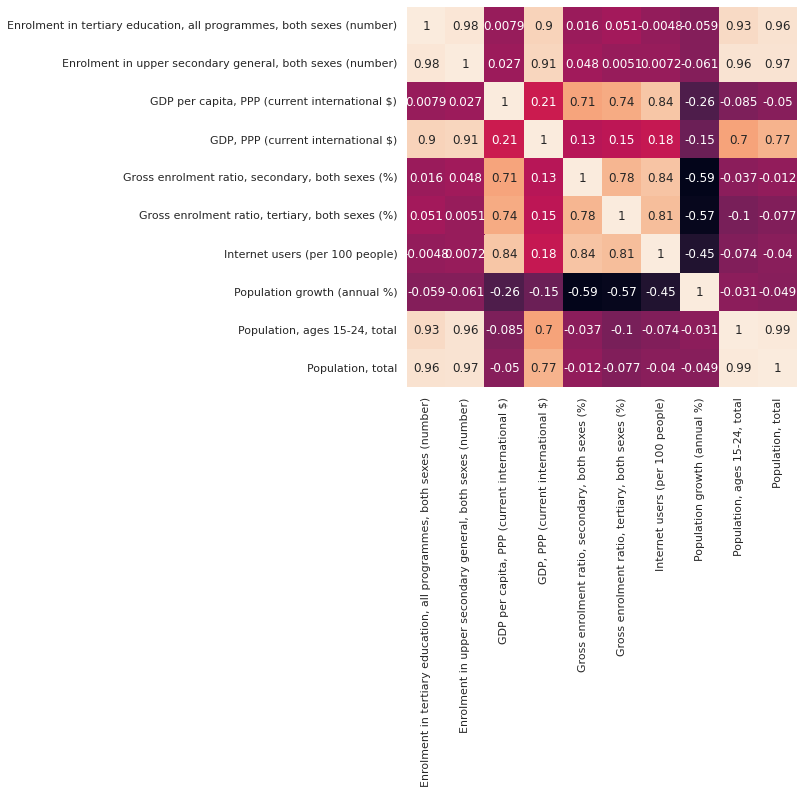

In [101]:
  f,ax = plt.subplots(figsize=(7, 7))
  sns.heatmap(dataFinalpivot.corr(), cbar=False, annot=True, ax=ax);
  #on peut voir qu'il y a un carré où les variables sont très correlées entre elles

On choisit de supprimer la population totale et de garder la population agée de 15 à 25 ans car c'est la population ciblée pour notre étude

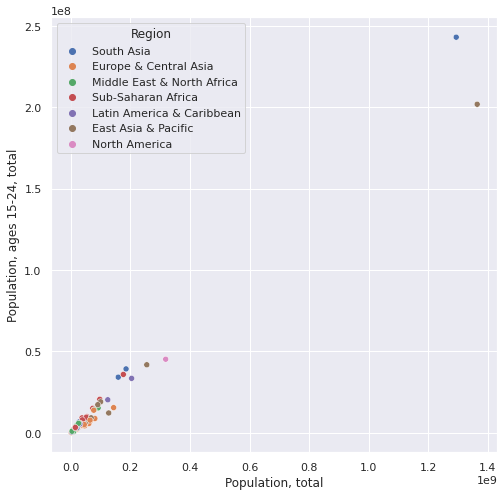

In [102]:
#Representation de la population total en fonction de la population des 15-25 ans
sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=dataFinalpivot,
                  x="Population, total", 
                  y='Population, ages 15-24, total', hue="Region")
#Representation linéaire

In [103]:
#On supprime donc l'indicateur à notre dataframe edStatsDataFinal
edStatsDataFinal = edStatsDataFinal[edStatsDataFinal['Indicator Name']!= "Population, total"]
edStatsDataFinal['Indicator Name'].unique()

array(['Enrolment in tertiary education, all programmes, both sexes (number)',
       'Enrolment in upper secondary general, both sexes (number)',
       'GDP per capita, PPP (current international $)',
       'GDP, PPP (current international $)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Internet users (per 100 people)', 'Population growth (annual %)',
       'Population, ages 15-24, total'], dtype=object)

Au niveau de l'éducation : je decide de choisir le taux brut de scolarisation secondaire et tertiaire

On supprime donc les variables du nombre d'inscription dans le secondaire et tertiaire qui sont très corrélées entre elles et très corrélées avec la population 

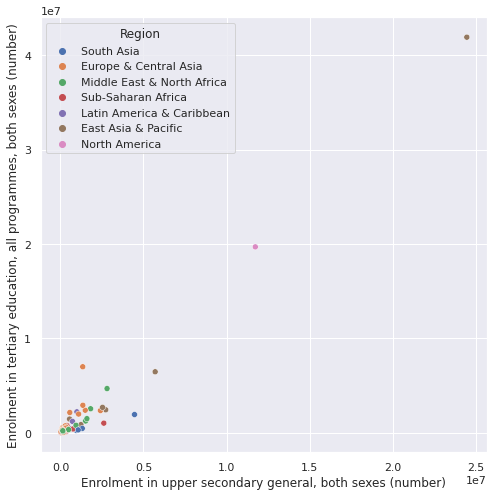

In [104]:
#Representation du nombre d'inscription dans le tertiaire en fonction du nombre d'inscription dans le secondaire
sns.set(rc = {'figure.figsize':(8,8)})
sns.scatterplot(data=dataFinalpivot,
                  x="Enrolment in upper secondary general, both sexes (number)", 
                  y="Enrolment in tertiary education, all programmes, both sexes (number)", hue="Region");
#Representation linéaire

In [105]:
#On supprime les deux indicateurs à notre dataframe edStatsDataFinal
edStatsDataFinal = edStatsDataFinal[~edStatsDataFinal['Indicator Name'].isin(["Enrolment in upper secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)"])]
edStatsDataFinal['Indicator Name'].unique()

array(['GDP per capita, PPP (current international $)',
       'GDP, PPP (current international $)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Internet users (per 100 people)', 'Population growth (annual %)',
       'Population, ages 15-24, total'], dtype=object)

In [106]:
edStatsSeries[edStatsSeries['Series Code']=='SE.SEC.ENRR'][['Long definition']]

,Long definition
2307,"Total enrollment in secondary education, regardless of age, expressed as a percentage of the population of official secondary education age. GER can exceed 100% due to the inclusion of over-aged and under-aged students because of early or late school entrance and grade repetition."


Au niveau économique, on choisit le PIB/habitant PPP et supprimer le PIB PPP


In [107]:
edStatsDataFinal = edStatsDataFinal[edStatsDataFinal['Indicator Name']!= "GDP, PPP (current international $)"]
edStatsDataFinal.head()

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92872,South Asia,Afghanistan,"GDP per capita, PPP (current international $)",Low income,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641
92960,South Asia,Afghanistan,"Gross enrolment ratio, secondary, both sexes (%)",Low income,NaN,13.048740,NaN,13.317080,18.664789,19.783701,29.930460,30.083160,40.223381,46.732761,53.246830,54.616180,56.677341,56.688660,55.656158,55.644409
92964,South Asia,Afghanistan,"Gross enrolment ratio, tertiary, both sexes (%)",Low income,NaN,NaN,NaN,1.256840,1.256030,NaN,NaN,NaN,NaN,3.903390,NaN,3.755980,NaN,NaN,8.662800,NaN
93000,South Asia,Afghanistan,Internet users (per 100 people),Low income,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.840000,3.550000,4.000000,5.000000,5.454545,5.900000,7.000000,8.260000
93932,South Asia,Afghanistan,Population growth (annual %),Low income,3.494659,4.251504,4.720528,4.818041,4.468918,3.870470,3.228630,2.755225,2.512574,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234


In [108]:
#On vérifie la suppression des indicateurs
edStatsDataFinal['Indicator Name'].unique()
#Il nous reste donc 6 indicateurs

array(['GDP per capita, PPP (current international $)',
       'Gross enrolment ratio, secondary, both sexes (%)',
       'Gross enrolment ratio, tertiary, both sexes (%)',
       'Internet users (per 100 people)', 'Population growth (annual %)',
       'Population, ages 15-24, total'], dtype=object)

In [109]:
#On supprime les 3 indicateurs supprimés à notre dataframe pivot 
dataFinalpivot = dataFinalpivot.drop(["Enrolment in upper secondary general, both sexes (number)","Enrolment in tertiary education, all programmes, both sexes (number)","Population, total", "GDP, PPP (current international $)"], axis=1)

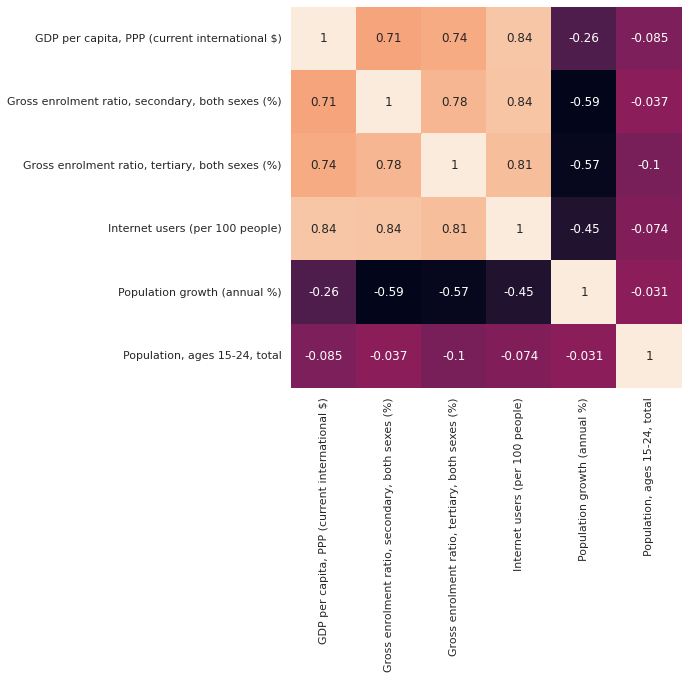

In [110]:
  #On regarde la matrice de corrélation des variables restantes
  f,ax = plt.subplots(figsize=(7, 7))
  sns.heatmap(dataFinalpivot.corr(), cbar=False, annot=True, ax=ax);
  #Il ne reste que des variables corrélés entre elles à moins de 85%

Les variables restantes sont:
- "Population growth (annual %)" : SP.POP.GROW
- "Population, ages 15-24, total" : SP.POP.1524.TO.UN
- "Gross enrolment ratio, secondary, both sexes (%)" : SE.SEC.ENRR
- "Gross enrolment ratio, tertiary, both sexes (%)" : SE.TER.ENRR
- "Internet users (per 100 people)" : IT.NET.USER.P2
- "GDP per capita, PPP (current international $)": NY.GDP.PCAP.PP.CD

## **Gestion des valeurs manquantes**

### Taux de remplissage du dataframe en fonction des différents pays

In [111]:
edStatsDataFinal.head(2)

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
92872,South Asia,Afghanistan,"GDP per capita, PPP (current international $)",Low income,NaN,NaN,875.51761,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641
92960,South Asia,Afghanistan,"Gross enrolment ratio, secondary, both sexes (%)",Low income,NaN,13.04874,NaN,13.317080,18.664789,19.783701,29.930460,30.083160,40.223381,46.732761,53.246830,54.616180,56.677341,56.688660,55.656158,55.644409


In [112]:
#Taux de remplissage de chaque pays sur les 6 indicateurs 
tauxDeRemplissage = edStatsDataFinal.drop(columns = ['Region','Income Group', 'Indicator Name']).set_index(['Country Name']).notnull().groupby(['Country Name']).sum()            
totalindicators = len(edStatsDataFinal['Indicator Name'].unique())
tauxDeRemplissageprcentage = round(tauxDeRemplissage*100/ totalindicators,2)
tauxDeRemplissageprcentage['Taux de remplissage moyen'] = round(tauxDeRemplissageprcentage.mean(axis=1),2)
tauxDeRemplissageprcentage.sort_values(['Taux de remplissage moyen'],ascending = True).head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Taux de remplissage moyen
Country Name,,,,,,,,,,,,,,,,,
Somalia,50.00,50.00,50.00,50.00,50.00,50.00,50.00,66.67,50.00,50.00,33.33,50.00,50.00,50.00,50.00,50.00,50.00
"Korea, Dem. People’s Rep.",50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,83.33,50.00,66.67,50.00,33.33,33.33,66.67,52.08
Puerto Rico,50.00,50.00,50.00,50.00,50.00,50.00,50.00,66.67,66.67,83.33,83.33,83.33,83.33,83.33,66.67,33.33,62.50
United Arab Emirates,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
Singapore,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
Haiti,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67
Papua New Guinea,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,83.33,66.67,66.67,66.67,67.71
Zambia,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,83.33,83.33,66.67,66.67,66.67,68.75
Turkmenistan,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,66.67,100.00,66.67,68.75


In [113]:
#On supprime les pays avec un taux moyen de remplissage inférieur à 60%
countries_to_drop = tauxDeRemplissageprcentage[tauxDeRemplissageprcentage['Taux de remplissage moyen']<60].index
edStatsDataFinal = edStatsDataFinal[~edStatsDataFinal['Country Name'].isin(countries_to_drop)]

### Representation graphique des différentes variables pour voir comment supprimer les valeurs manquantes

**Indicateur "Population growth (annual %)"**

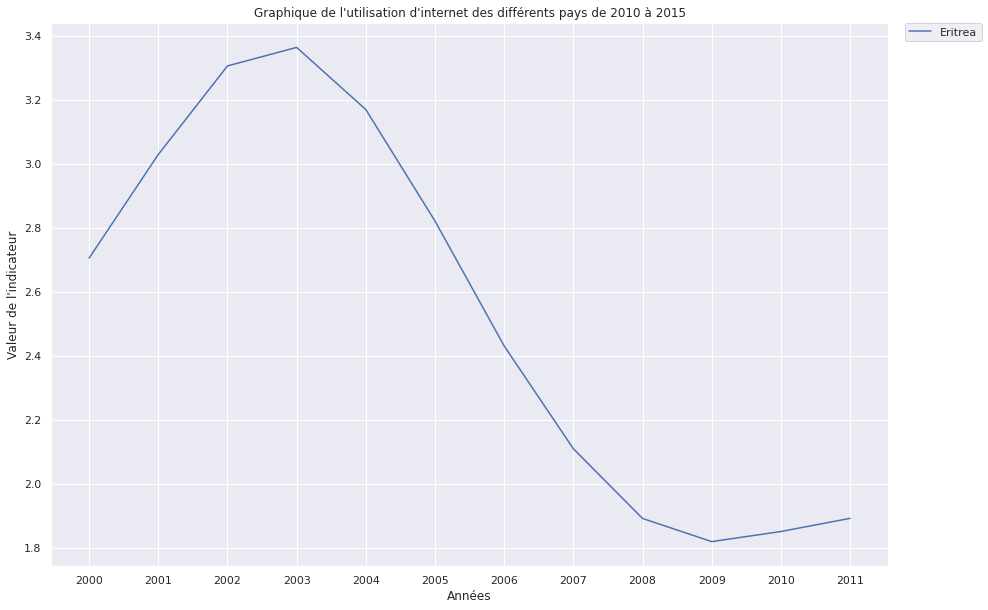

In [114]:
#Pour l'indicateur du taux de croissance de la population
df_popg = edStatsDataFinal[edStatsDataFinal['Indicator Name'] == "Population growth (annual %)"]
#On garde les lignes avec une valeur manquante en 2014 (année qu'on a choisi)
df_popgna = df_popg[df_popg['2014'].isnull()]
df_popgna.drop(['Indicator Name','Income Group'], axis =1,inplace=True)
df_popgna.set_index('Country Name', inplace= True)
#On transpose le dataframe pour pouvoir tracer notre graphie
df_popgnaT = df_popgna.T
#On trace l'evolution de l'indicateur en fonction des années de 2010 à 2015
df = df_popgnaT.loc['2000':'2015',:]
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(data=df).set(title = "Graphique de l'utilisation d'internet des différents pays de 2010 à 2015",xlabel='Années', ylabel="Valeur de l'indicateur")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

In [115]:
#On affiche les valeurs manquantes pour cet indicateur
df_popg[df_popg.isna().any(axis=1)]

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
266187,Europe & Central Asia,Croatia,Population growth (annual %),High income: nonOECD,-2.850973,0.315813,0.000000,0.000000,-0.022525,0.067560,-0.045035,-0.090131,-0.033640,-0.122524,-0.255390,NaN,-0.305656,-0.278509,-0.407343,-0.824099
313832,Sub-Saharan Africa,Eritrea,Population growth (annual %),Low income,2.704784,3.028508,3.305107,3.362961,3.168878,2.820555,2.430314,2.109183,1.891406,1.819043,1.850516,1.891652,NaN,NaN,NaN,NaN


In [116]:
#On vérifie les lignes avec une valeur manquante en 2014 pour l'indicateur 
df_popg[df_popg['2014'].isna()]

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
313832,Sub-Saharan Africa,Eritrea,Population growth (annual %),Low income,2.704784,3.028508,3.305107,3.362961,3.168878,2.820555,2.430314,2.109183,1.891406,1.819043,1.850516,1.891652,NaN,NaN,NaN,NaN


In [117]:
#On remplace les valeurs manquantes par la valeur de l'année precedente 
to_select = (edStatsDataFinal['Country Name']=="Eritrea") & (edStatsDataFinal['Indicator Name']=="Population growth (annual %)")
edStatsDataFinal.loc[to_select] = edStatsDataFinal.loc[to_select].fillna(method='ffill', axis=1)

In [118]:
#On vérifie les données liées à l'indicateur 
edStatsDataFinal.loc[(edStatsDataFinal['Country Name']=="Eritrea") & (edStatsDataFinal['Indicator Name']=="Population growth (annual %)")]

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
313832,Sub-Saharan Africa,Eritrea,Population growth (annual %),Low income,2.704784,3.028508,3.305107,3.362961,3.168878,2.820555,2.430314,2.109183,1.891406,1.819043,1.850516,1.891652,1.891652,1.891652,1.891652,1.891652


**Indicateur "Population, ages 15-24, total"**

In [119]:
#Pour l'indicateur de la population agé de 15 à 24 ans
df_pop = edStatsDataFinal[edStatsDataFinal['Indicator Name'] == "Population, ages 15-24, total"]
df_popna = df_pop[df_pop['2014'].isnull()]
df_popna.drop(['Indicator Name','Income Group'], axis =1,inplace=True)
df_popna.set_index('Country Name', inplace= True)
df_popna

,Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,
Puerto Rico,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Serbia,Europe & Central Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Indicateur 'Gross enrolment ratio, tertiary, both sexes (%)'**

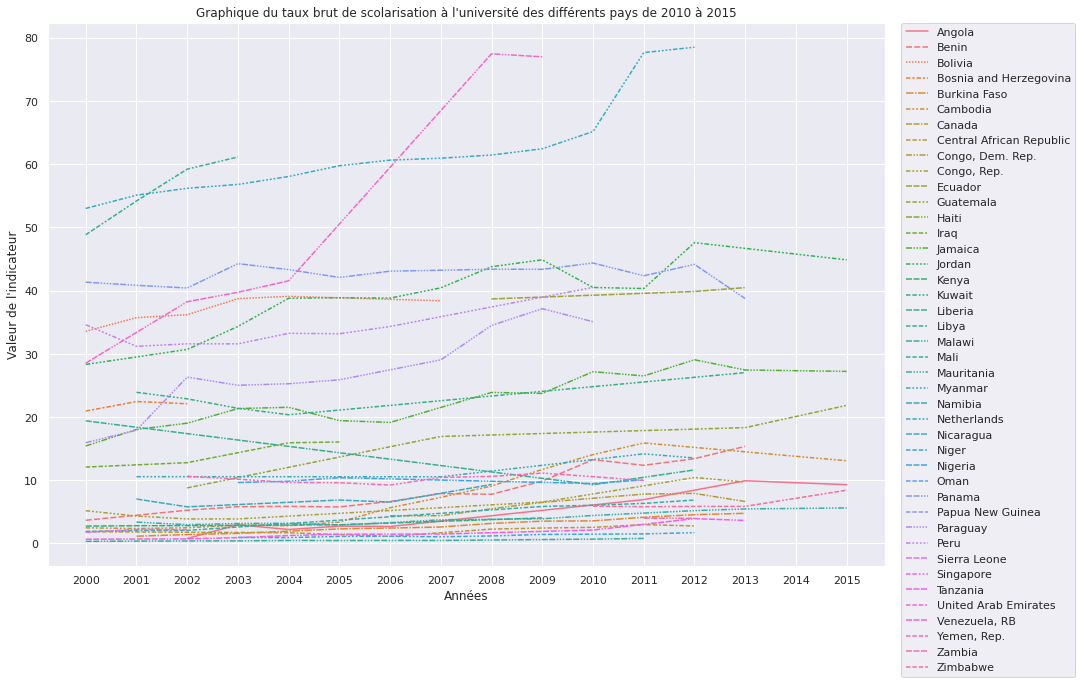

In [120]:
#Pour l'indicateur du taux brut de scolarisation à l'université
df_ter = edStatsDataFinal[edStatsDataFinal['Indicator Name'] == 'Gross enrolment ratio, tertiary, both sexes (%)']
df_terna = df_ter[df_ter['2014'].isnull()]
df_terna.drop(['Indicator Name','Income Group'], axis =1,inplace=True)
df_terna.set_index('Country Name', inplace= True)
df_ternaT = df_terna.T
#On trace l'evolution de l'indicateur
df = df_ternaT.loc['2000':'2015',:]
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(data=df).set(title = "Graphique du taux brut de scolarisation à l'université des différents pays de 2010 à 2015",xlabel='Années', ylabel="Valeur de l'indicateur")
#plt.ylim((0, 1e7))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Indicateur 'Gross enrolment ratio, secondary, both sexes (%)'**

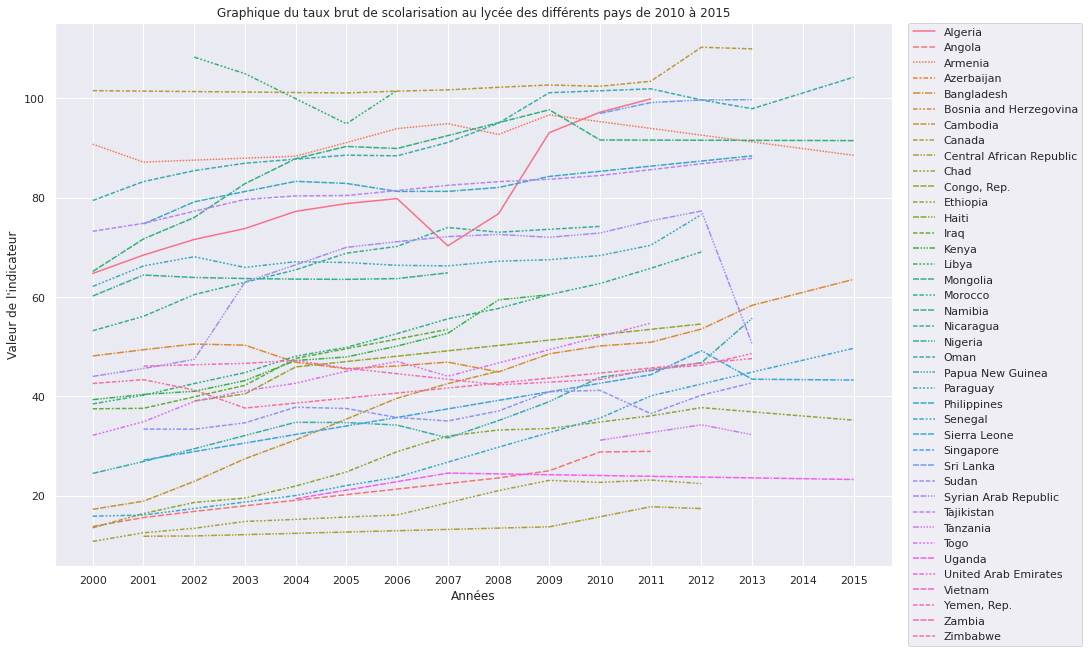

In [121]:
#Pour l'indicateur du taux brut de scolarisation au lycée 
df_sec = edStatsDataFinal[edStatsDataFinal['Indicator Name'] == 'Gross enrolment ratio, secondary, both sexes (%)']
df_secna = df_sec[df_sec['2014'].isnull()]
df_secna.drop(['Indicator Name','Income Group'], axis =1,inplace=True)
df_secna.set_index('Country Name', inplace= True)
df_secnaT = df_secna.T
#On trace l'evolution de l'indicateur
df = df_secnaT.loc['2000':'2015',:]
sns.set(rc = {'figure.figsize':(15,10)})
sns.lineplot(data=df).set(title = "Graphique du taux brut de scolarisation au lycée des différents pays de 2010 à 2015",xlabel='Années', ylabel="Valeur de l'indicateur")
#plt.ylim((0, 1e7))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

**Indicateur 'Internet users (per 100 people)'**

In [122]:
#Pour l'indicateur du taux d'accès à internet
df_internet = edStatsDataFinal[edStatsDataFinal['Indicator Name'] == 'Internet users (per 100 people)']
#df_internetna = df_internet[df_internet.isnull().any(axis=1)]
df_internetna = df_internet[df_internet.isnull().any(axis=1)]
df_internetna.drop(['Indicator Name','Income Group'], axis =1,inplace=True)
df_internetna.set_index('Country Name', inplace= True)
df_internetna

,Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.9,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.26
Australia,East Asia & Pacific,46.756116,52.689266,NaN,NaN,NaN,63.0,66.0,69.45,71.67,74.25,76.0,79.487698,79.0,83.453497,84.0,84.560519
Azerbaijan,Europe & Central Asia,0.147758,0.305565,4.999714,NaN,NaN,8.030375,11.992177,14.54,17.08,27.4,46.0,50.0,54.2,73.000001,75.000016,77.0
Belarus,Europe & Central Asia,1.860398,4.300616,8.950971,NaN,NaN,NaN,16.2,19.7,23.0,27.43,31.8,39.648896,46.91,54.17,59.02,67.3
Eritrea,Sub-Saharan Africa,0.136712,0.157815,0.22709,NaN,NaN,NaN,NaN,0.41,0.47,0.54,0.61,0.7,0.8,0.9,0.99,1.083733
Iraq,Middle East & North Africa,NaN,0.1,0.5,0.6,0.9,0.9,0.952344,0.93,1.0,1.06,2.5,5.0,7.1,9.2,13.21,17.22
Liberia,Sub-Saharan Africa,0.017703,0.033812,0.032713,0.031869,0.031011,NaN,NaN,0.551377,0.53,2.0,2.3,2.5,2.6,3.2,5.41,5.903868
Libya,Middle East & North Africa,0.187043,0.366533,2.244418,2.814518,3.532838,3.917788,4.301052,4.721999,9.0,10.8,14.0,14.0,NaN,16.5,17.76,19.01608
Mongolia,East Asia & Pacific,1.255652,1.653238,2.039573,NaN,NaN,NaN,NaN,9.0,9.8,10.0,10.2,12.499991,16.4,17.699984,19.942447,21.436031


In [123]:
#il n'y a pas de valeurs manquantes pour cet indicateur en 2014
df_internet[df_internet['2014'].isnull()]

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015


**Indicateur "GDP per capita, PPP (current international $)"**

In [124]:
#Pour l'indicateur du PIB/habitant
df_GDP = edStatsDataFinal[edStatsDataFinal['Indicator Name'] == "GDP per capita, PPP (current international $)"]
df_GDPna = df_GDP[df_GDP['2014'].isnull()]
df_GDPna.drop(['Indicator Name','Income Group'], axis =1,inplace=True)
df_GDPna.set_index('Country Name', inplace= True)
df_GDPna

,Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country Name,,,,,,,,,,,,,,,,,
Cuba,Latin America & Caribbean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Eritrea,Sub-Saharan Africa,1330.93985,1436.292218,1453.333656,1395.231872,1409.043034,1450.333417,1444.85803,1473.074941,1329.644373,1366.590931,1387.714663,1510.458929,NaN,NaN,NaN,NaN
Libya,Middle East & North Africa,17375.646482,17186.16388,17010.813583,19299.516457,20392.476154,23189.827241,25071.944342,26966.4962,27843.125645,27523.817457,29030.843382,11192.790639,NaN,NaN,NaN,NaN
Puerto Rico,Latin America & Caribbean,25747.509436,28866.168947,29790.596977,30727.862746,32122.190331,33392.420904,34256.910348,34198.688483,34443.780369,34071.244891,33756.815933,34195.640847,34272.194989,35023.686217,NaN,NaN
Syrian Arab Republic,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
West Bank and Gaza,Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Suppression des valeurs manquantes avec ffil de la méthode fillna() : rempli successivement les données avec la valeur remplie précédente

In [125]:
#Methode fillna() pour remplir les valeurs manquantes 
dataFinalna = edStatsDataFinal.copy()
indicateurs = edStatsDataFinal.columns[4:].tolist()
#variables numériques
dataNum = dataFinalna[indicateurs]
#variables qualitatives
dataCat = dataFinalna.loc[:, ['Region','Country Name', 'Indicator Name', 'Income Group']]
#on rempli les valeurs manquantes 
dataNum.fillna(method='ffill', axis=1, inplace=True) 
#On concatène les deux dataframes pour reformer notre dataframe de début
dataFinal = pd.concat([dataCat, dataNum], axis=1)

In [126]:
dataFinal[dataFinal['2014'].isnull()]

,Region,Country Name,Indicator Name,Income Group,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
136940,Europe & Central Asia,Azerbaijan,"Gross enrolment ratio, secondary, both sexes (%)",Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180920,Europe & Central Asia,Bosnia and Herzegovina,"Gross enrolment ratio, secondary, both sexes (%)",Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268792,Latin America & Caribbean,Cuba,"GDP per capita, PPP (current international $)",Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393490,Latin America & Caribbean,Haiti,"Gross enrolment ratio, secondary, both sexes (%)",Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393494,Latin America & Caribbean,Haiti,"Gross enrolment ratio, tertiary, both sexes (%)",Low income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
628054,Middle East & North Africa,Oman,"Gross enrolment ratio, tertiary, both sexes (%)",High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
642714,East Asia & Pacific,Papua New Guinea,"Gross enrolment ratio, tertiary, both sexes (%)",Lower middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
665847,Latin America & Caribbean,Puerto Rico,"Population, ages 15-24, total",High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702497,Europe & Central Asia,Serbia,"Population, ages 15-24, total",Upper middle income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
712345,East Asia & Pacific,Singapore,"Gross enrolment ratio, secondary, both sexes (%)",High income: nonOECD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Valeurs manquantes restantes de notre dataset

In [127]:
#On ne va garder que la derniere année ou il y a le plus de données : l'année 2014
dataFinal14 = dataFinal[['Region','Country Name','Indicator Name','Income Group','2014']]
dataFinal14.rename(columns={'2014': 'Année la plus récente'}, inplace=True)
#On fait un pivot de notre dataframe
dataFinalpivot = dataFinal14.pivot(index=["Country Name", "Region","Income Group"], columns = 'Indicator Name', values ='Année la plus récente')
dataFinalpivot = dataFinalpivot.reset_index()
dataFinalpivot = dataFinalpivot.rename_axis(None, axis=1)
dataFinalpivot.head()

,Country Name,Region,Income Group,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total"
0,Afghanistan,South Asia,Low income,1875.447407,55.656158,8.662800,7.0,3.183201,7032072.0
1,Albania,Europe & Central Asia,Upper middle income,11332.506541,96.426086,62.706848,60.1,-0.207047,569427.0
2,Algeria,Middle East & North Africa,Upper middle income,14203.292233,99.860191,34.593811,29.5,2.000666,6625398.0
3,Angola,Sub-Saharan Africa,Upper middle income,6594.397826,28.898720,9.923570,10.2,3.485413,4162115.0
4,Argentina,Latin America & Caribbean,Upper middle income,19801.259115,106.777901,82.917389,64.7,1.032709,6894149.0


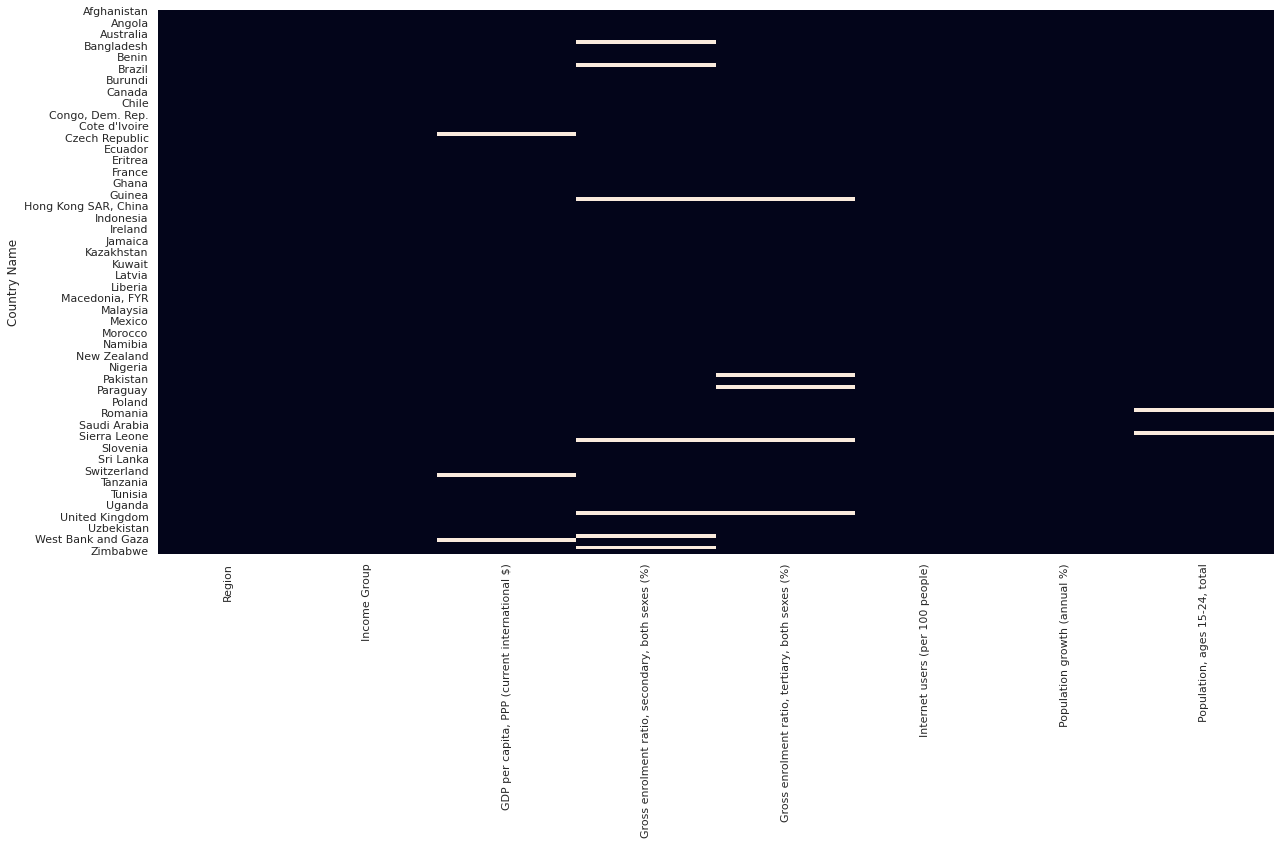

In [128]:
# Affiche un graphe  des données manquantes sur la colonne des indicateurs codes
plt.figure(figsize=(20,10))
dataFinalpivot.set_index(['Country Name'], inplace=True)
sns.heatmap(dataFinalpivot.isna(), cbar=False)
plt.show()

In [129]:
# On compte le nombre de valeurs manquantes par lignes et on stocke la valeur dans une nouvelle colonne
dataFinalpivot['nb_nan'] = dataFinalpivot.isna().sum(axis=1)
# On trie des lignes en fonction du nombre de valeurs manquantes
dataFinalpivot.sort_values('nb_nan', ascending = False)

,Region,Income Group,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total",nb_nan
Country Name,,,,,,,,,
United Arab Emirates,Middle East & North Africa,High income: nonOECD,67551.002395,NaN,NaN,90.400000,0.714763,733259.0,2
Haiti,Latin America & Caribbean,Low income,1741.110401,NaN,NaN,11.400000,1.339654,2151027.0,2
Singapore,East Asia & Pacific,High income: nonOECD,84593.428145,NaN,NaN,79.029236,1.298440,686475.0,2
Papua New Guinea,East Asia & Pacific,Lower middle income,3809.182433,40.346321,NaN,6.500000,2.123003,1499599.0,1
Oman,Middle East & North Africa,High income: nonOECD,42433.616279,97.882332,NaN,70.220000,6.504660,583251.0,1
Cuba,Latin America & Caribbean,Upper middle income,NaN,99.665131,40.999760,29.070184,0.241555,1454310.0,1
Bosnia and Herzegovina,Europe & Central Asia,Upper middle income,11233.776554,NaN,22.108311,60.800000,-1.087641,496695.0,1
Serbia,Europe & Central Asia,Upper middle income,13806.012808,94.344414,58.054970,62.075080,-0.469489,NaN,1
Puerto Rico,Latin America & Caribbean,High income: nonOECD,35023.686217,81.288818,84.383781,76.133860,-1.633128,NaN,1


In [130]:
#on supprime les lignes ayant plus de 2 valeurs manquantes
dataFinalpivot = dataFinalpivot.drop(dataFinalpivot[dataFinalpivot['nb_nan'] >= 2].index, axis =0)
dataFinalpivot.sort_values('nb_nan', ascending = False)

,Region,Income Group,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total",nb_nan
Country Name,,,,,,,,,
Puerto Rico,Latin America & Caribbean,High income: nonOECD,35023.686217,81.288818,84.383781,76.133860,-1.633128,NaN,1
Azerbaijan,Europe & Central Asia,Upper middle income,17607.622893,NaN,23.159731,75.000016,1.248209,1614172.0,1
Oman,Middle East & North Africa,High income: nonOECD,42433.616279,97.882332,NaN,70.220000,6.504660,583251.0,1
Bosnia and Herzegovina,Europe & Central Asia,Upper middle income,11233.776554,NaN,22.108311,60.800000,-1.087641,496695.0,1
Cuba,Latin America & Caribbean,Upper middle income,NaN,99.665131,40.999760,29.070184,0.241555,1454310.0,1
Papua New Guinea,East Asia & Pacific,Lower middle income,3809.182433,40.346321,NaN,6.500000,2.123003,1499599.0,1
Serbia,Europe & Central Asia,Upper middle income,13806.012808,94.344414,58.054970,62.075080,-0.469489,NaN,1
Vietnam,East Asia & Pacific,Lower middle income,5656.954905,NaN,30.477739,41.000000,1.074207,17298090.0,1
West Bank and Gaza,Middle East & North Africa,Lower middle income,NaN,82.240448,44.006870,53.670000,2.957995,1016961.0,1


In [131]:
# on supprime la colonne qui n'est plus utile
dataFinalpivot = dataFinalpivot.drop('nb_nan', axis=1)

In [132]:
dataFinalpivot.isna().sum()

Region                                              0
Income Group                                        0
GDP per capita, PPP (current international $)       3
Gross enrolment ratio, secondary, both sexes (%)    4
Gross enrolment ratio, tertiary, both sexes (%)     2
Internet users (per 100 people)                     0
Population growth (annual %)                        0
Population, ages 15-24, total                       2
dtype: int64

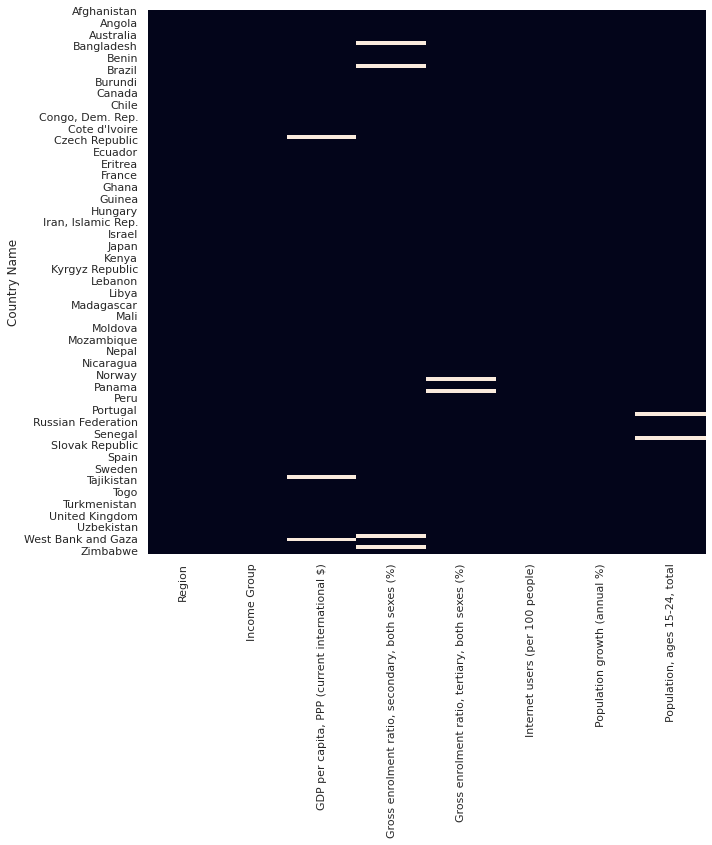

In [133]:
# Affiche un graphe  des données manquantes sur la colonne des indicateurs codes
plt.figure(figsize=(10,10)) 
sns.heatmap(dataFinalpivot.isna(), cbar=False)
plt.show()

## **Representations graphiques des données**

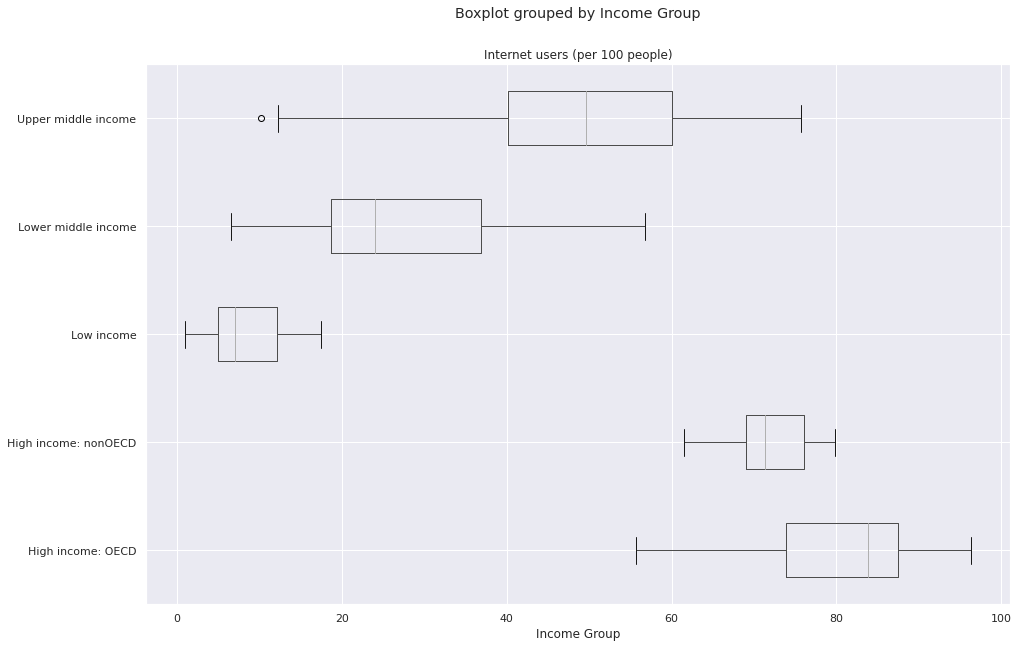

In [134]:
#Boxplot 
dataFinalpivot.boxplot(column= "Internet users (per 100 people)", by= 'Income Group', vert = False)
plt.show();
#plus le salaire est elevé plus les populations ont tendance à avoir accès à internet

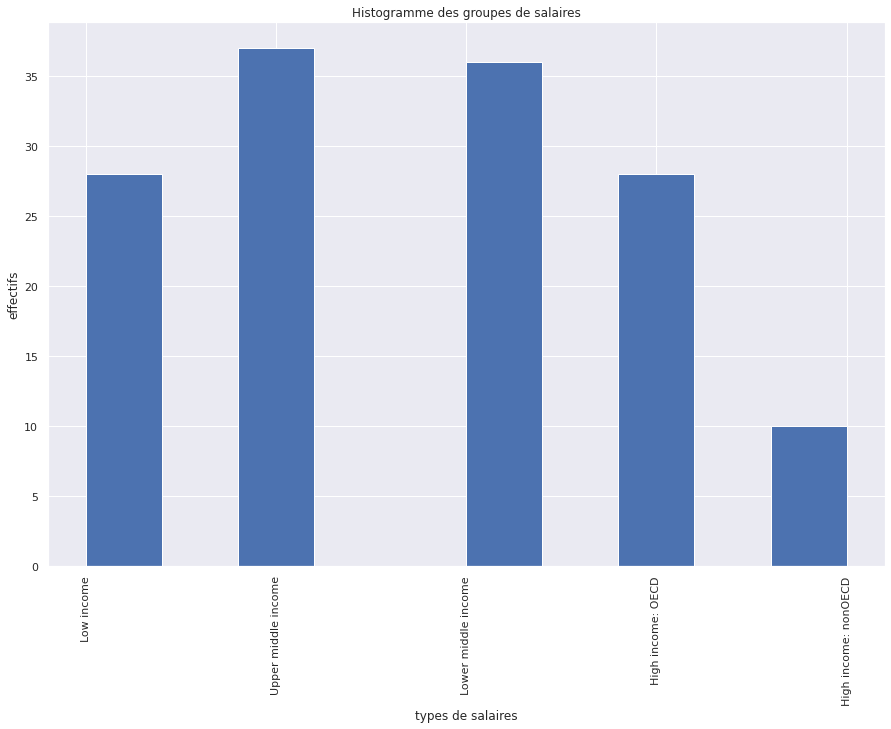

In [135]:
plt.hist(dataFinalpivot["Income Group"])
plt.title('Histogramme des groupes de salaires')
plt.xlabel('types de salaires')
plt.xticks(rotation = 90)
plt.ylabel('effectifs')
plt.show()

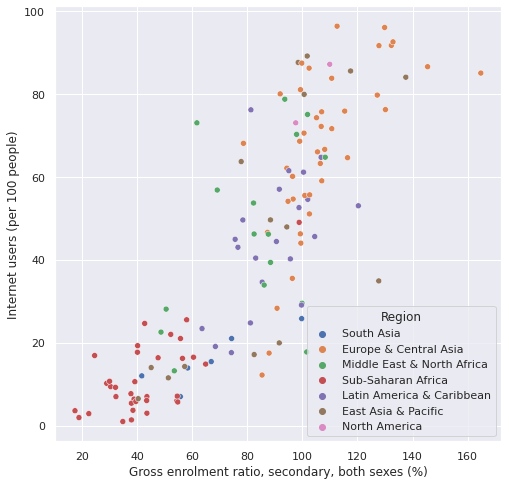

In [136]:
#Scatterplot de la relation entre les utilisateurs d'internet et le taux d'inscription au lycée
sns.set(rc = {'figure.figsize':(8,8)})
ax = sns.scatterplot(data=dataFinalpivot, 
                  x="Gross enrolment ratio, secondary, both sexes (%)", 
                  y="Internet users (per 100 people)", hue="Region")
#On en déduit que plus le taux d'inscription au lycée est élevé dans un pays plus le taux d'accès à internet est élevé

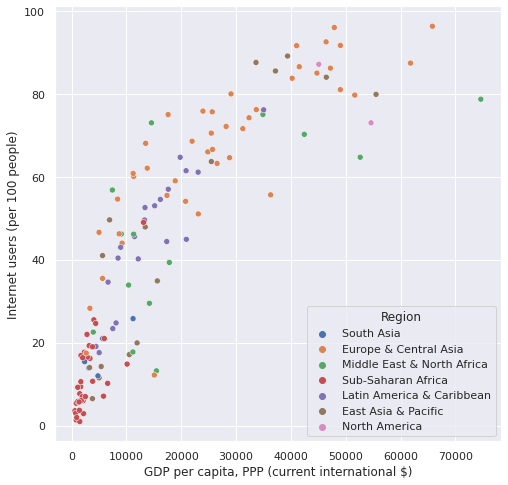

In [137]:
#Scatterplot de la relation entre les utilisateurs d'internet et le PIB
sns.set(rc = {'figure.figsize':(8,8)})
ax = sns.scatterplot(data=dataFinalpivot, 
                  x="GDP per capita, PPP (current international $)", 
                  y="Internet users (per 100 people)", hue="Region")
#On voit que plus le PIB/habitant est elevé plus les habitants ont accès à internet

## **Scores**

In [138]:
#On affiche les ordres de grandeurs des indicateurs statistiques classiques : moyenne, écart type, minimum, médiane, maximum..
round(dataFinalpivot.describe(),2)

,"GDP per capita, PPP (current international $)","Gross enrolment ratio, secondary, both sexes (%)","Gross enrolment ratio, tertiary, both sexes (%)",Internet users (per 100 people),Population growth (annual %),"Population, ages 15-24, total"
count,136.00,135.00,137.00,139.00,139.00,1.370000e+02
mean,17234.45,81.20,39.90,42.93,1.41,8.701138e+06
std,16742.29,30.76,28.45,28.56,1.42,2.751293e+07
min,633.92,17.38,0.80,0.99,-3.11,2.021430e+05
25%,3844.54,54.63,11.64,16.43,0.42,1.059054e+06
50%,11329.02,88.39,38.74,44.39,1.32,2.494844e+06
75%,25526.16,101.65,64.27,67.33,2.36,6.543025e+06
max,74613.95,164.81,113.87,96.30,6.50,2.430027e+08


### Score avec pondération similaire pour chaque indicateur 

In [139]:
# On reset l'index du dataframe pivot 
dataFinalpivot = dataFinalpivot.reset_index()

In [140]:
#Score des différents indicateurs :
#créer des scores entre 0 et 1
df_score = dataFinalpivot.copy()

liste_indicateurs = df_score.columns[3:].tolist()

for indicateur in liste_indicateurs:
  df_score[indicateur] = dataFinalpivot[indicateur] / dataFinalpivot[indicateur].max()

#On calcule le Score Moyen pour chaque pays pour pouvoir les classer
df_score["Score Moyen"] = df_score.sum(axis = 1)/6 

#on renomme les colonnes
dict_col = {'GDP per capita, PPP (current international $)':'Score GDP per capita, PPP',
            'Gross enrolment ratio, secondary, both sexes (%)':'Score Gross enrolment ratio, secondary',
            'Gross enrolment ratio, tertiary, both sexes (%)': 'Score Gross enrolment ratio, tertiary',
            'Internet users (per 100 people)': 'Score Internet users',
            'Population growth (annual %)': 'Score Population growth',
            'Population, ages 15-24, total':'Score Population, ages 15-24'}
df_score.rename(dict_col, axis=1, inplace = True) 

#On classe les pays en fonction de leur score
df_score.sort_values(by='Score Moyen', ascending=False).set_index('Country Name').head(10)

,Region,Income Group,"Score GDP per capita, PPP","Score Gross enrolment ratio, secondary","Score Gross enrolment ratio, tertiary",Score Internet users,Score Population growth,"Score Population, ages 15-24",Score Moyen
Country Name,,,,,,,,,
Norway,Europe & Central Asia,High income: OECD,0.881699,0.683173,0.674295,1.000000,0.173374,0.002660,0.569200
Kuwait,Middle East & North Africa,High income: nonOECD,1.000000,0.567943,0.237346,0.817238,0.766940,0.001885,0.565225
Australia,East Asia & Pacific,High income: OECD,0.622484,0.834678,0.793054,0.872274,0.226651,0.012025,0.560195
Denmark,Europe & Central Asia,High income: OECD,0.641973,0.787978,0.715862,0.996781,0.077952,0.002910,0.537243
Finland,Europe & Central Asia,High income: OECD,0.556354,0.882727,0.778696,0.898550,0.063579,0.002655,0.530427
Belgium,Europe & Central Asia,High income: OECD,0.599592,1.000000,0.643872,0.882658,0.036031,0.005138,0.527882
Netherlands,Europe & Central Asia,High income: OECD,0.656875,0.802838,0.689381,0.951886,0.055319,0.008248,0.527424
United States,North America,High income: OECD,0.731747,0.591977,0.761066,0.758048,0.114245,0.186133,0.523869
Sweden,Europe & Central Asia,High income: OECD,0.621931,0.806441,0.547576,0.960748,0.152540,0.004779,0.515669


### Score en variant la pondération des indicateurs en fonction de leur importance dans l'étude

Pondérations :
- Internet 4
- PIB/hab 3
- Taux de scolarisation secondaire et tertiaire 3
- Taux de croissance de population 2
- population agée de 15-24 ans 1

In [141]:
#score pondéré
df_score_pondere = df_score.copy()
poids = [3,3,3,4,2,1]
somme_poids = poids[0] + poids[1] + poids[2] + poids[3] + poids[4] + poids[5]

df_score_pondere['Moyenne des scores pondérés'] = (df_score_pondere["Score GDP per capita, PPP"]*poids[0] +
                 df_score_pondere["Score Gross enrolment ratio, secondary"]*poids[1] +
                  df_score_pondere["Score Gross enrolment ratio, tertiary"]*poids[2] + 
                 df_score_pondere["Score Internet users"]*poids[3] + 
                 df_score_pondere["Score Population growth"]*poids[4] +
                 df_score_pondere["Score Population, ages 15-24"]*poids[5])/somme_poids

#On classe en fonction de la moyenne des scores pondérés pour avoir le classement des pays avec ce score
df = df_score_pondere.sort_values(by='Moyenne des scores pondérés', ascending=False).head(10)
df.set_index('Country Name')

,Region,Income Group,"Score GDP per capita, PPP","Score Gross enrolment ratio, secondary","Score Gross enrolment ratio, tertiary",Score Internet users,Score Population growth,"Score Population, ages 15-24",Score Moyen,Moyenne des scores pondérés
Country Name,,,,,,,,,,
Norway,Europe & Central Asia,High income: OECD,0.881699,0.683173,0.674295,1.000000,0.173374,0.002660,0.569200,0.691682
Australia,East Asia & Pacific,High income: OECD,0.622484,0.834678,0.793054,0.872274,0.226651,0.012025,0.560195,0.669067
Denmark,Europe & Central Asia,High income: OECD,0.641973,0.787978,0.715862,0.996781,0.077952,0.002910,0.537243,0.661461
Finland,Europe & Central Asia,High income: OECD,0.556354,0.882727,0.778696,0.898550,0.063579,0.002655,0.530427,0.648584
Netherlands,Europe & Central Asia,High income: OECD,0.656875,0.802838,0.689381,0.951886,0.055319,0.008248,0.527424,0.648357
Belgium,Europe & Central Asia,High income: OECD,0.599592,1.000000,0.643872,0.882658,0.036031,0.005138,0.527882,0.646139
Kuwait,Middle East & North Africa,High income: nonOECD,1.000000,0.567943,0.237346,0.817238,0.766940,0.001885,0.565225,0.638786
Sweden,Europe & Central Asia,High income: OECD,0.621931,0.806441,0.547576,0.960748,0.152540,0.004779,0.515669,0.630043
Ireland,Europe & Central Asia,High income: OECD,0.691979,0.771810,0.681705,0.827518,0.063163,0.002384,0.506426,0.617204


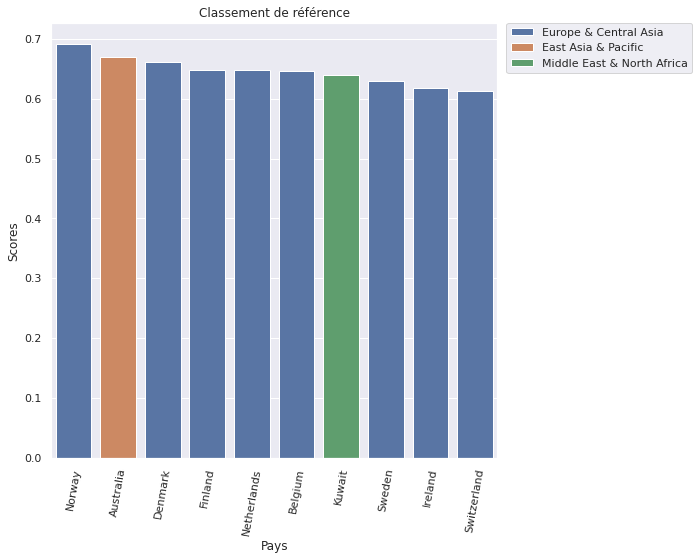

In [142]:
#On trace un barplot du score des pays
dfgraph = df[['Country Name', 'Region','Moyenne des scores pondérés']]
sns.barplot(x = 'Country Name' ,y='Moyenne des scores pondérés',data = dfgraph, hue='Region',dodge=False, palette=["C0", "C1", "C2"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.xticks(rotation = 80)
plt.xlabel('Pays')
plt.ylabel("Scores")
plt.title("Classement de référence")
plt.show()

## **Conclusion**

L’analyse exploratoire des données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion. 
Le top 10 des pays à fort potentiels est:
la Norvège, l'Autralie, le Danemark, la Finlande, les Pays Bas, la Belgique, le Koweit, la Suède, l'Irlande et la Suisse.
C'est dans ces pays que l'entreprise peut prendre des décisions d'ouverture. 
On constate que la plupart des pays trouvés font partie de l'Europe sauf l'Autralie et le Koweit.
Ces résultats paraissent assez réelles car ces pays font partie des pays les plus développées (PIB/hab les plus élevés) et peuvent donc avoir un niveau d'éducation élevé.
On peut cependant se demander pourquoi les Etats-Unis ou la Chine ne sont pas dans la liste car ils ont les PIB les plus elevés du monde, mais quand on regarde de plus près, les Etats-Unis se trouvent en 13ème position et Hong Kong en 16éme position.